In [156]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 1- Set the Working directory¶

In [157]:
os.chdir("/Users/ajeet/Google Drive/DSAssignment/ZS")

In [158]:
ls

sample submission.csv        testWHST.csv
test.csv                     train.csv*
testDataOR.csv               trainDataOR.csv
testDfEncode.csv             trainDfEncode.csv
testDfEncodeWithStreet.csv   trainDfEncodeWithStreet.csv
testFinalANN.csv             trainWHST.csv


# 2- Load the Data--(Dataset - datset)

In [159]:
Dataset = pd.read_csv("train.csv")

In [160]:
Dataset.head()

,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION NO.,INSPECTION_TYPE,CRITICAL FLAG,CAMIS
0,TACOSSSSSSS,BROOKLYN,3398,FULTON ST,11208.0,7182773780,Mexican,6/8/2016,Violations were cited in the following area(s).,89.0,NaN,NaN,8/28/2017,Initial Inspection,Pre-permit (Non-operational),Critical,86566813
1,SPOLINI'S,QUEENS,11625,METROPOLITAN AVENUE,11418.0,7188055852,Italian,2/18/2016,Violations were cited in the following area(s).,23.0,NaN,NaN,8/28/2017,Initial Inspection,Cycle Inspection,Critical,84913823
2,EL DORADO CAFE,QUEENS,10202,ROOSEVELT AVENUE,11368.0,7184265992,"Latin (Cuban, Dominican, Puerto Rican, South &...",3/4/2015,Violations were cited in the following area(s).,7.0,A,3/4/2015,8/28/2017,Initial Inspection,Cycle Inspection,Critical,70749585
3,SANREMO PIZZA,QUEENS,5601,MYRTLE AVENUE,11385.0,7184971903,Pizza,12/4/2014,Violations were cited in the following area(s).,12.0,A,12/4/2014,8/28/2017,Initial Inspection,Cycle Inspection,Critical,59396548
4,95 SOUTH,BROOKLYN,778,FRANKLIN AVENUE,11238.0,3477506180,American,6/3/2017,Violations were cited in the following area(s).,11.0,NaN,NaN,8/28/2017,Initial Inspection,Inter-Agency Task Force,Not Critical,79915156


In [161]:
testDataset = pd.read_csv("test.csv")

In [162]:
testDataset.head()

,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION NO.,INSPECTION_TYPE,CAMIS
0,ROCKIN' RAW,MANHATTAN,171,SULLIVAN STREET,10012.0,2124773777,Vegetarian,5/7/2015,Violations were cited in the following area(s).,7.0,NaN,NaN,8/28/2017,Initial Inspection,Cycle Inspection,35773502
1,HONG KONG RESTAURANT,QUEENS,10259,JAMAICA AVENUE,11418.0,7188463300,Chinese,1/22/2015,Violations were cited in the following area(s).,10.0,A,1/22/2015,8/28/2017,Initial Inspection,Cycle Inspection,92746946
2,UNCLE VANYA,MANHATTAN,315,WEST 54 STREET,10019.0,2122620542,Russian,12/7/2015,Violations were cited in the following area(s).,14.0,NaN,NaN,8/28/2017,Initial Inspection,Cycle Inspection,28205432
3,GABRIEL KREUTHER,MANHATTAN,37,W 42ND ST,10036.0,2122575826,French,7/21/2015,Violations were cited in the following area(s).,9.0,A,7/21/2015,8/28/2017,Initial Inspection,Pre-permit (Operational),53192030
4,CHIFA RESTAURANT,QUEENS,7320,NORTHERN BOULEVARD,11372.0,7188980108,Peruvian,2/7/2017,Violations were cited in the following area(s).,16.0,NaN,NaN,8/28/2017,Initial Inspection,Cycle Inspection,79547153


##### <font color = blue><b><i>Make a copy of original Dataset--</i></b></font>

In [163]:
dataset = Dataset.copy()

In [164]:
test_dataset = testDataset.copy()

In [165]:
dataset.head(2)

,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION NO.,INSPECTION_TYPE,CRITICAL FLAG,CAMIS
0,TACOSSSSSSS,BROOKLYN,3398,FULTON ST,11208.0,7182773780,Mexican,6/8/2016,Violations were cited in the following area(s).,89.0,NaN,NaN,8/28/2017,Initial Inspection,Pre-permit (Non-operational),Critical,86566813
1,SPOLINI'S,QUEENS,11625,METROPOLITAN AVENUE,11418.0,7188055852,Italian,2/18/2016,Violations were cited in the following area(s).,23.0,NaN,NaN,8/28/2017,Initial Inspection,Cycle Inspection,Critical,84913823


In [166]:
test_dataset.head(2)

,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION NO.,INSPECTION_TYPE,CAMIS
0,ROCKIN' RAW,MANHATTAN,171,SULLIVAN STREET,10012.0,2124773777,Vegetarian,5/7/2015,Violations were cited in the following area(s).,7.0,NaN,NaN,8/28/2017,Initial Inspection,Cycle Inspection,35773502
1,HONG KONG RESTAURANT,QUEENS,10259,JAMAICA AVENUE,11418.0,7188463300,Chinese,1/22/2015,Violations were cited in the following area(s).,10.0,A,1/22/2015,8/28/2017,Initial Inspection,Cycle Inspection,92746946


In [167]:
dataset.shape

(215955, 17)

In [168]:
test_dataset.shape

(23995, 16)

# Clean Data

In [169]:
colToRemove = ['PHONE','INSPECTION DATE','GRADE DATE','RECORD DATE','CAMIS','DBA']

In [170]:
#Drop Columns
trainData = dataset.drop(colToRemove, axis = 1)
testData = test_dataset.drop(colToRemove, axis = 1)

In [171]:
trainData.shape

(215955, 11)

In [172]:
dataset.shape

(215955, 17)

In [173]:
testData.shape

(23995, 10)

In [174]:
test_dataset.shape

(23995, 16)

In [175]:
trainData.head()

,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,ACTION,SCORE,GRADE,INSPECTION NO.,INSPECTION_TYPE,CRITICAL FLAG
0,BROOKLYN,3398,FULTON ST,11208.0,Mexican,Violations were cited in the following area(s).,89.0,NaN,Initial Inspection,Pre-permit (Non-operational),Critical
1,QUEENS,11625,METROPOLITAN AVENUE,11418.0,Italian,Violations were cited in the following area(s).,23.0,NaN,Initial Inspection,Cycle Inspection,Critical
2,QUEENS,10202,ROOSEVELT AVENUE,11368.0,"Latin (Cuban, Dominican, Puerto Rican, South &...",Violations were cited in the following area(s).,7.0,A,Initial Inspection,Cycle Inspection,Critical
3,QUEENS,5601,MYRTLE AVENUE,11385.0,Pizza,Violations were cited in the following area(s).,12.0,A,Initial Inspection,Cycle Inspection,Critical
4,BROOKLYN,778,FRANKLIN AVENUE,11238.0,American,Violations were cited in the following area(s).,11.0,NaN,Initial Inspection,Inter-Agency Task Force,Not Critical


In [176]:
text = trainData['INSPECTION_TYPE'][0]

In [177]:
trainData.shape[0]

215955

In [178]:
import re

In [179]:
text

'Pre-permit (Non-operational) '

In [180]:
text = re.sub("[^a-zA-Z]", " ", text)

In [181]:
text

'Pre permit  Non operational  '

In [182]:
trainData['INSPECTION_TYPE'][0] = text

/Users/ajeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [183]:
textColumns = ['BORO','STREET','CUISINE DESCRIPTION','ACTION','GRADE','INSPECTION NO.','INSPECTION_TYPE']

In [184]:
trainData['INSPECTION_TYPE'][4]

'Inter-Agency Task Force '

In [185]:
trainData['INSPECTION_TYPE'] = trainData['INSPECTION_TYPE'].str.replace('[^a-zA-Z]', ' ')


In [186]:
trainData['INSPECTION_TYPE'][4]

'Inter Agency Task Force '

In [187]:
for var in textColumns:
    trainData[var] = trainData[var].str.replace('[^a-zA-Z0-9]', ' ')
    testData[var] = testData[var].str.replace('[^a-zA-Z0-9]', ' ')
    print("-------------------------Next Variable--------------------")
        
    
    

-------------------------Next Variable--------------------
-------------------------Next Variable--------------------
-------------------------Next Variable--------------------
-------------------------Next Variable--------------------
-------------------------Next Variable--------------------
-------------------------Next Variable--------------------
-------------------------Next Variable--------------------


In [188]:
trainData['BUILDING'] = trainData['BUILDING'].str.replace('[^0-9]', '')
testData['BUILDING'] = testData['BUILDING'].str.replace('[^0-9]', '')

In [189]:
trainData['BUILDING'] = trainData['BUILDING'].replace('', np.nan, regex=True)
testData['BUILDING'] = testData['BUILDING'].replace('', np.nan, regex=True)

In [190]:
trainData['STREET'].value_counts()

BROADWAY                               8016
3 AVENUE                               3150
5 AVENUE                               2327
2 AVENUE                               2290
8 AVENUE                               1914
ROOSEVELT AVENUE                       1768
1 AVENUE                               1741
LEXINGTON AVENUE                       1701
NORTHERN BOULEVARD                     1677
AMSTERDAM AVENUE                       1672
7 AVENUE                               1653
3RD AVE                                1601
9 AVENUE                               1549
JAMAICA AVENUE                         1540
2ND AVE                                1481
ROOSEVELT AVE                          1330
QUEENS BOULEVARD                       1275
5TH AVE                                1228
8TH AVE                                1189
NORTHERN BLVD                          1140
FULTON STREET                          1071
FLATBUSH AVENUE                        1043
MYRTLE AVENUE                   

##### Handle The Target Variabel in the train Data

In [191]:
trainData['CRITICAL FLAG'] = trainData['CRITICAL FLAG'].astype(object)

In [192]:
trainData.dtypes

BORO                    object
BUILDING                object
STREET                  object
ZIPCODE                float64
CUISINE DESCRIPTION     object
ACTION                  object
SCORE                  float64
GRADE                   object
INSPECTION NO.          object
INSPECTION_TYPE         object
CRITICAL FLAG           object
dtype: object

In [193]:
trainData['CRITICAL FLAG'].value_counts()

Critical          118888
Not Critical       93402
Not Applicable      3665
Name: CRITICAL FLAG, dtype: int64

In [194]:
3665/trainData.shape[0]

0.016971128244310157

less than 2% of the target variable having the value - Not Applicable , so drop all the rows having this value

In [195]:
trainDf = trainData[trainData['CRITICAL FLAG'] != 'Not Applicable']

In [196]:
testDf = testData.copy()

In [197]:
trainDf.shape

(212290, 11)

In [198]:
trainData.shape

(215955, 11)

# 4- Missing value Analysis

In [199]:
trainDf.isnull().sum()

BORO                        0
BUILDING                  521
STREET                      0
ZIPCODE                     0
CUISINE DESCRIPTION         0
ACTION                      0
SCORE                    9769
GRADE                  107266
INSPECTION NO.              0
INSPECTION_TYPE             0
CRITICAL FLAG               0
dtype: int64

##### 1- GRADE

In [200]:
107266/trainDf.shape[0]





0.505280512506477

There are more that 50% rows has missing data in the Grade column- so we need to remove this column

In [201]:
trainDf = trainDf.drop('GRADE', axis = 1)


In [202]:
testDf = testDf.drop('GRADE', axis = 1)

In [203]:
trainDf.isnull().sum()

BORO                      0
BUILDING                521
STREET                    0
ZIPCODE                   0
CUISINE DESCRIPTION       0
ACTION                    0
SCORE                  9769
INSPECTION NO.            0
INSPECTION_TYPE           0
CRITICAL FLAG             0
dtype: int64

In [204]:
trainDf.dropna(inplace=True)

In [205]:
trainDf.shape

(202021, 10)

In [206]:
trainDf.isnull().sum()

BORO                   0
BUILDING               0
STREET                 0
ZIPCODE                0
CUISINE DESCRIPTION    0
ACTION                 0
SCORE                  0
INSPECTION NO.         0
INSPECTION_TYPE        0
CRITICAL FLAG          0
dtype: int64

##### Test Data

In [207]:
testDf.isnull().sum()

BORO                      0
BUILDING                 58
STREET                    0
ZIPCODE                   0
CUISINE DESCRIPTION       0
ACTION                   55
SCORE                  1366
INSPECTION NO.           55
INSPECTION_TYPE           0
dtype: int64

We have to impute all missing data

In [208]:
testDf.dtypes

BORO                    object
BUILDING                object
STREET                  object
ZIPCODE                float64
CUISINE DESCRIPTION     object
ACTION                  object
SCORE                  float64
INSPECTION NO.          object
INSPECTION_TYPE         object
dtype: object

In [209]:
# for var in testDf.columns:
#     if(testDf[var].isnull().sum()>0):
#         print(var)
#         print(testDf[var].value_counts())

In [210]:
testDf['BUILDING'].fillna(0, inplace = True)

In [211]:
testDf['ACTION'].fillna('Violations were cited in the following area s', inplace = True)

In [212]:
testDf['INSPECTION NO.'].fillna('Initial Inspection', inplace = True)

In [213]:
testDf['SCORE'].fillna(testDf['SCORE'].median(), inplace = True)

In [214]:
testDf.isnull().sum()

BORO                   0
BUILDING               0
STREET                 0
ZIPCODE                0
CUISINE DESCRIPTION    0
ACTION                 0
SCORE                  0
INSPECTION NO.         0
INSPECTION_TYPE        0
dtype: int64

# 3- Data Type Conversion

In [215]:
trainDf.dtypes

BORO                    object
BUILDING                object
STREET                  object
ZIPCODE                float64
CUISINE DESCRIPTION     object
ACTION                  object
SCORE                  float64
INSPECTION NO.          object
INSPECTION_TYPE         object
CRITICAL FLAG           object
dtype: object

We do not need , Phone, any dates to predict and also CAMIS
So for model building, need to remove--




In [216]:
testDf.dtypes

BORO                    object
BUILDING                object
STREET                  object
ZIPCODE                float64
CUISINE DESCRIPTION     object
ACTION                  object
SCORE                  float64
INSPECTION NO.          object
INSPECTION_TYPE         object
dtype: object

Categorical- BORO, BUILDING, STREET, ZIPCODE,CUISINE DESCRIPTION, ACTION,GRADE, INSPECTION NO., INSPECTION_TYPE ,CRITICAL FLAG
Numerical- SCORE,

So only need to convert ZIPCODE column from numerical to categorical-

In [217]:
trainDf['ZIPCODE'] = trainDf['ZIPCODE'].astype(object)
testDf['ZIPCODE'] = testDf['ZIPCODE'].astype(object)

In [218]:
testDf.dtypes

BORO                    object
BUILDING                object
STREET                  object
ZIPCODE                 object
CUISINE DESCRIPTION     object
ACTION                  object
SCORE                  float64
INSPECTION NO.          object
INSPECTION_TYPE         object
dtype: object

In [219]:
trainDf['BUILDING'] = trainDf['BUILDING'].astype(int)
testDf['BUILDING'] = testDf['BUILDING'].astype(int)

In [220]:
testDf.dtypes

BORO                    object
BUILDING                 int64
STREET                  object
ZIPCODE                 object
CUISINE DESCRIPTION     object
ACTION                  object
SCORE                  float64
INSPECTION NO.          object
INSPECTION_TYPE         object
dtype: object

In [221]:
trainDf.dtypes

BORO                    object
BUILDING                 int64
STREET                  object
ZIPCODE                 object
CUISINE DESCRIPTION     object
ACTION                  object
SCORE                  float64
INSPECTION NO.          object
INSPECTION_TYPE         object
CRITICAL FLAG           object
dtype: object

# Outlier Analysis

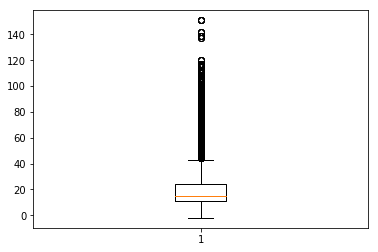

In [222]:
plt.boxplot(trainDf['SCORE'])
plt.show()

In [223]:
#Detect and delete outliers from data

#count = 0  
q75, q25 = np.percentile(trainDf.loc[:,"SCORE"], [75 ,25])
iqr = q75 - q25

min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)
   
print(len(trainDf[trainDf['SCORE']<=min]))
print(len(trainDf[trainDf['SCORE']>=max]))

-8.5
43.5
0
10837


##### New dataset created after Removing all observation having outliers

In [224]:
trainDataOR = trainDf[trainDf['SCORE']<=max]

In [225]:
testDataOR = testDf.copy()

In [226]:
trainDataOR.shape

(191184, 10)

In [227]:
trainDf.shape

(202021, 10)

##### Now , These pre-processed Dataframe - save to the file

In [228]:
trainDataOR['STREET'].dtypes == 'object'

True

In [229]:
for var in trainDataOR.columns:
    if(trainDataOR[var].dtypes == 'object'):
        trainDataOR[var] = trainDataOR[var].astype(object)

/Users/ajeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [230]:
for var in testDataOR.columns:
    if(testDataOR[var].dtypes == 'object'):
        testDataOR[var] = testDataOR[var].astype(object)

In [231]:
trainDataOR.dtypes

BORO                    object
BUILDING                 int64
STREET                  object
ZIPCODE                 object
CUISINE DESCRIPTION     object
ACTION                  object
SCORE                  float64
INSPECTION NO.          object
INSPECTION_TYPE         object
CRITICAL FLAG           object
dtype: object

In [232]:
trainDataOR.to_csv("trainDataOR.csv",index=False)

In [233]:
testDataOR.to_csv("testDataOR.csv",index=False)

##### Without STREET Column

In [234]:
trainWHST = trainDataOR.copy()
testWHST = testDataOR.copy()

In [235]:
trainWHST = trainWHST.drop('STREET', axis = 1)

testWHST = testWHST.drop('STREET', axis = 1)

In [236]:
trainWHST.to_csv("trainWHST.csv",index=False)
testWHST.to_csv("testWHST.csv",index=False)

# Data Scaling

(array([1.0000e+00, 0.0000e+00, 6.4000e+01, 0.0000e+00, 5.7000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.7330e+03, 0.0000e+00,
        0.0000e+00, 1.1260e+03, 0.0000e+00, 2.5590e+03, 0.0000e+00,
        3.4680e+03, 0.0000e+00, 1.8230e+03, 0.0000e+00, 0.0000e+00,
        8.6810e+03, 0.0000e+00, 4.4500e+03, 0.0000e+00, 1.1417e+04,
        0.0000e+00, 1.2948e+04, 0.0000e+00, 1.2195e+04, 0.0000e+00,
        0.0000e+00, 2.1047e+04, 0.0000e+00, 1.4459e+04, 0.0000e+00,
        3.1490e+03, 0.0000e+00, 3.6560e+03, 0.0000e+00, 0.0000e+00,
        4.0090e+03, 0.0000e+00, 6.4900e+03, 0.0000e+00, 5.6600e+03,
        0.0000e+00, 6.5730e+03, 0.0000e+00, 6.0510e+03, 0.0000e+00,
        0.0000e+00, 5.4850e+03, 0.0000e+00, 5.6410e+03, 0.0000e+00,
        4.6660e+03, 0.0000e+00, 4.9520e+03, 0.0000e+00, 0.0000e+00,
        4.3000e+03, 0.0000e+00, 3.9450e+03, 0.0000e+00, 3.6320e+03,
        0.0000e+00, 2.8220e+03, 0.0000e+00, 2.5730e+03, 0.0000e+00,
        0.0000e+00, 2.5710e+03, 0.0000e+00, 2.19

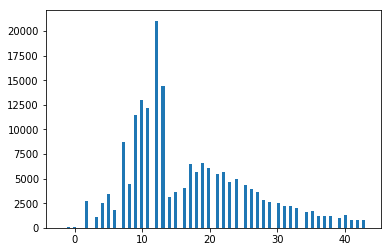

In [237]:
#Normality check
%matplotlib inline  
plt.hist(trainWHST['SCORE'], bins=100)

In [238]:
#Nomalisation
cnames = ['SCORE','BUILDING']
for i in cnames:
    print(i)
    print(trainWHST[i].max())
    rangeOfData = (trainWHST[i].max() - trainWHST[i].min())
    trainWHST[i] = (trainWHST[i] - trainWHST[i].min())/(rangeOfData)

SCORE
43.0
BUILDING
94179419


In [239]:
cnames = ['SCORE','BUILDING']
for i in cnames:
    print(i)
    print(testWHST[i].max())
    rangeOfData = (testWHST[i].max() - testWHST[i].min())
    testWHST[i] = (testWHST[i] - testWHST[i].min())/(rangeOfData)

SCORE
139.0
BUILDING
94179419


In [240]:
testWHST.shape

(23995, 8)

In [241]:
test_dataset.shape

(23995, 16)

In [242]:
testWHST.head()

,BORO,BUILDING,ZIPCODE,CUISINE DESCRIPTION,ACTION,SCORE,INSPECTION NO.,INSPECTION_TYPE
0,MANHATTAN,1.815683e-06,10012,Vegetarian,Violations were cited in the following area s,0.063830,Initial Inspection,Cycle Inspection
1,QUEENS,1.089304e-04,11418,Chinese,Violations were cited in the following area s,0.085106,Initial Inspection,Cycle Inspection
2,MANHATTAN,3.344680e-06,10019,Russian,Violations were cited in the following area s,0.113475,Initial Inspection,Cycle Inspection
3,MANHATTAN,3.928672e-07,10036,French,Violations were cited in the following area s,0.078014,Initial Inspection,Pre permit Operational
4,QUEENS,7.772399e-05,11372,Peruvian,Violations were cited in the following area s,0.127660,Initial Inspection,Cycle Inspection


# Data Encoding(Dummy variable)--

##### STEP-1: Create logistic data. Save target variable first

In [243]:
#STEP-1: Create logistic data. Save target variable first
trainDfEncode = pd.DataFrame(trainWHST['CRITICAL FLAG'])

In [244]:
trainDfEncode.head()

,CRITICAL FLAG
1,Critical
2,Critical
3,Critical
4,Not Critical
5,Critical


##### STEP-2: Add all continous variables

In [245]:
cnames = ['BUILDING','SCORE']

#STEP-2: Add all continous variables
trainDfEncode = trainDfEncode.join(trainWHST[cnames])

In [246]:
testDfEncode = pd.DataFrame(testWHST['BUILDING'])

In [247]:
testDfEncode = testDfEncode.join(testWHST['SCORE'])

In [248]:
testDfEncode.head()

,BUILDING,SCORE
0,1.815683e-06,0.063830
1,1.089304e-04,0.085106
2,3.344680e-06,0.113475
3,3.928672e-07,0.078014
4,7.772399e-05,0.127660


In [249]:
trainDfEncode.head()

,CRITICAL FLAG,BUILDING,SCORE
1,Critical,0.000123,0.555556
2,Critical,0.000108,0.200000
3,Critical,0.000059,0.311111
4,Not Critical,0.000008,0.288889
5,Critical,0.000034,0.200000


##### STEP-3: Add all categorical variables 

In [250]:
trainWHST.head(1)

,BORO,BUILDING,ZIPCODE,CUISINE DESCRIPTION,ACTION,SCORE,INSPECTION NO.,INSPECTION_TYPE,CRITICAL FLAG
1,QUEENS,0.000123,11418,Italian,Violations were cited in the following area s,0.555556,Initial Inspection,Cycle Inspection,Critical


In [251]:
catVar = ['BORO','ZIPCODE','CUISINE DESCRIPTION','ACTION','INSPECTION NO.','INSPECTION_TYPE']

In [252]:
trainDfEncode = trainDfEncode.join(trainWHST[catVar])

In [253]:
testDfEncode = testDfEncode.join(testWHST[catVar])

In [254]:
trainDfEncode.head()

,CRITICAL FLAG,BUILDING,SCORE,BORO,ZIPCODE,CUISINE DESCRIPTION,ACTION,INSPECTION NO.,INSPECTION_TYPE
1,Critical,0.000123,0.555556,QUEENS,11418,Italian,Violations were cited in the following area s,Initial Inspection,Cycle Inspection
2,Critical,0.000108,0.200000,QUEENS,11368,Latin Cuban Dominican Puerto Rican South ...,Violations were cited in the following area s,Initial Inspection,Cycle Inspection
3,Critical,0.000059,0.311111,QUEENS,11385,Pizza,Violations were cited in the following area s,Initial Inspection,Cycle Inspection
4,Not Critical,0.000008,0.288889,BROOKLYN,11238,American,Violations were cited in the following area s,Initial Inspection,Inter Agency Task Force
5,Critical,0.000034,0.200000,BROOKLYN,11208,Hamburgers,Violations were cited in the following area s,Initial Inspection,Pre permit Operational


In [255]:
testDfEncode.head()

,BUILDING,SCORE,BORO,ZIPCODE,CUISINE DESCRIPTION,ACTION,INSPECTION NO.,INSPECTION_TYPE
0,1.815683e-06,0.063830,MANHATTAN,10012,Vegetarian,Violations were cited in the following area s,Initial Inspection,Cycle Inspection
1,1.089304e-04,0.085106,QUEENS,11418,Chinese,Violations were cited in the following area s,Initial Inspection,Cycle Inspection
2,3.344680e-06,0.113475,MANHATTAN,10019,Russian,Violations were cited in the following area s,Initial Inspection,Cycle Inspection
3,3.928672e-07,0.078014,MANHATTAN,10036,French,Violations were cited in the following area s,Initial Inspection,Pre permit Operational
4,7.772399e-05,0.127660,QUEENS,11372,Peruvian,Violations were cited in the following area s,Initial Inspection,Cycle Inspection


In [256]:
testDfEncode['BORO'].value_counts()

MANHATTAN        9589
BROOKLYN         5978
QUEENS           5487
BRONX            2138
STATEN ISLAND     803
Name: BORO, dtype: int64

In [257]:
testDfEncode.head()

,BUILDING,SCORE,BORO,ZIPCODE,CUISINE DESCRIPTION,ACTION,INSPECTION NO.,INSPECTION_TYPE
0,1.815683e-06,0.063830,MANHATTAN,10012,Vegetarian,Violations were cited in the following area s,Initial Inspection,Cycle Inspection
1,1.089304e-04,0.085106,QUEENS,11418,Chinese,Violations were cited in the following area s,Initial Inspection,Cycle Inspection
2,3.344680e-06,0.113475,MANHATTAN,10019,Russian,Violations were cited in the following area s,Initial Inspection,Cycle Inspection
3,3.928672e-07,0.078014,MANHATTAN,10036,French,Violations were cited in the following area s,Initial Inspection,Pre permit Operational
4,7.772399e-05,0.127660,QUEENS,11372,Peruvian,Violations were cited in the following area s,Initial Inspection,Cycle Inspection


In [258]:
for i in catVar:
    temp = pd.get_dummies(trainDfEncode[i], prefix = i)
    temp = temp.drop(temp.columns[[0]], axis=1)
    trainDfEncode = trainDfEncode.join(temp)

In [259]:
trainDfEncode.head(1)

,CRITICAL FLAG,BUILDING,SCORE,BORO,ZIPCODE,CUISINE DESCRIPTION,ACTION,INSPECTION NO.,INSPECTION_TYPE,BORO_BROOKLYN,...,ACTION_Violations were cited in the following area s,INSPECTION NO._ Initial Inspection,INSPECTION NO._ Re inspection,INSPECTION NO._ Reopening Inspection,INSPECTION NO._ Second Compliance Inspection,INSPECTION_TYPE_Cycle Inspection,INSPECTION_TYPE_Inter Agency Task Force,INSPECTION_TYPE_Pre permit Non operational,INSPECTION_TYPE_Pre permit Operational,INSPECTION_TYPE_Trans Fat
1,Critical,0.000123,0.555556,QUEENS,11418,Italian,Violations were cited in the following area s,Initial Inspection,Cycle Inspection,0,...,1,1,0,0,0,1,0,0,0,0


In [260]:
trainDfEncode = trainDfEncode.drop(catVar, axis=1)

In [261]:
trainDfEncode.shape

(191184, 330)

In [262]:
trainDfEncode.head(1)

,CRITICAL FLAG,BUILDING,SCORE,BORO_BROOKLYN,BORO_MANHATTAN,BORO_QUEENS,BORO_STATEN ISLAND,ZIPCODE_10002.0,ZIPCODE_10003.0,ZIPCODE_10004.0,...,ACTION_Violations were cited in the following area s,INSPECTION NO._ Initial Inspection,INSPECTION NO._ Re inspection,INSPECTION NO._ Reopening Inspection,INSPECTION NO._ Second Compliance Inspection,INSPECTION_TYPE_Cycle Inspection,INSPECTION_TYPE_Inter Agency Task Force,INSPECTION_TYPE_Pre permit Non operational,INSPECTION_TYPE_Pre permit Operational,INSPECTION_TYPE_Trans Fat
1,Critical,0.000123,0.555556,0,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0


##### TestData

In [263]:
for i in catVar:
    temp = pd.get_dummies(testDfEncode[i], prefix = i)
    temp = temp.drop(temp.columns[[0]], axis=1)
    testDfEncode = testDfEncode.join(temp)
    
testDfEncode = testDfEncode.drop(catVar, axis=1)

In [264]:
trainDfEncode.head()

,CRITICAL FLAG,BUILDING,SCORE,BORO_BROOKLYN,BORO_MANHATTAN,BORO_QUEENS,BORO_STATEN ISLAND,ZIPCODE_10002.0,ZIPCODE_10003.0,ZIPCODE_10004.0,...,ACTION_Violations were cited in the following area s,INSPECTION NO._ Initial Inspection,INSPECTION NO._ Re inspection,INSPECTION NO._ Reopening Inspection,INSPECTION NO._ Second Compliance Inspection,INSPECTION_TYPE_Cycle Inspection,INSPECTION_TYPE_Inter Agency Task Force,INSPECTION_TYPE_Pre permit Non operational,INSPECTION_TYPE_Pre permit Operational,INSPECTION_TYPE_Trans Fat
1,Critical,0.000123,0.555556,0,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
2,Critical,0.000108,0.200000,0,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
3,Critical,0.000059,0.311111,0,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
4,Not Critical,0.000008,0.288889,1,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
5,Critical,0.000034,0.200000,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


##### Encode the Target variable with label Encoder

In [265]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()


In [266]:
trainDfEncode['CRITICAL FLAG'] = labelEncoder.fit_transform(trainDfEncode['CRITICAL FLAG'])

In [267]:
trainDfEncode.head()

,CRITICAL FLAG,BUILDING,SCORE,BORO_BROOKLYN,BORO_MANHATTAN,BORO_QUEENS,BORO_STATEN ISLAND,ZIPCODE_10002.0,ZIPCODE_10003.0,ZIPCODE_10004.0,...,ACTION_Violations were cited in the following area s,INSPECTION NO._ Initial Inspection,INSPECTION NO._ Re inspection,INSPECTION NO._ Reopening Inspection,INSPECTION NO._ Second Compliance Inspection,INSPECTION_TYPE_Cycle Inspection,INSPECTION_TYPE_Inter Agency Task Force,INSPECTION_TYPE_Pre permit Non operational,INSPECTION_TYPE_Pre permit Operational,INSPECTION_TYPE_Trans Fat
1,0,0.000123,0.555556,0,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
2,0,0.000108,0.200000,0,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
3,0,0.000059,0.311111,0,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
4,1,0.000008,0.288889,1,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
5,0,0.000034,0.200000,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


##### Making the same dimension of train n test data

In [268]:
trainCols = trainDfEncode.columns
testCols = testDfEncode.columns

In [269]:
len(set(trainCols))

330

In [270]:
len(set(testCols))

316

Actaually train data has one extra column, so trainDf has 329 columns.

In [271]:
#take all the columns which are not present in the test data and remove it from the train data.
colToRemoveFromTheTrainData = list(set(trainCols) - set(testCols))

In [272]:
len(colToRemoveFromTheTrainData)

20

In [273]:
testList= [item for item in trainCols if item not in testCols]

In [274]:
len(testList)

20

In [275]:
colToRemoveFromTheTrainData.remove('CRITICAL FLAG')

In [276]:
len(colToRemoveFromTheTrainData)

19

In [277]:
colToRemoveFromTheTrainData

['ZIPCODE_10279.0',
 'ZIPCODE_10166.0',
 'ZIPCODE_10270.0',
 'ZIPCODE_10165.0',
 'ZIPCODE_10172.0',
 'ZIPCODE_11451.0',
 'ZIPCODE_10055.0',
 'ZIPCODE_10106.0',
 'ZIPCODE_11241.0',
 'ZIPCODE_10171.0',
 'ZIPCODE_10199.0',
 'ZIPCODE_10317.0',
 'ZIPCODE_10179.0',
 'ZIPCODE_10176.0',
 'ZIPCODE_10155.0',
 'ZIPCODE_10110.0',
 'ZIPCODE_10103.0',
 'ZIPCODE_10107.0',
 'ZIPCODE_10048.0']

In [278]:
#Now we can remove all these columns from the dfEncodeAll dataset.
trainDfEncode = trainDfEncode.drop(colToRemoveFromTheTrainData, axis = 1)

In [279]:
trainDfEncode.shape

(191184, 311)

In [280]:
testDfEncode.shape

(23995, 316)

In [281]:
colToRemoveFromTheTrainData = list(set(testDfEncode.columns) - set(trainDfEncode.columns))

In [282]:
len(colToRemoveFromTheTrainData)

6

In [283]:
colToRemoveFromTheTrainData

['ZIPCODE_10170.0',
 'INSPECTION_TYPE_Smoke Free Air Act ',
 'INSPECTION_TYPE_Cycle Inspection',
 'INSPECTION NO._Initial Inspection',
 'INSPECTION_TYPE_Calorie Posting ',
 'ACTION_Violations were cited in the following area s']

In [284]:
#Now we can remove all these columns from the dfEncodeAll dataset.
testDfEncode = testDfEncode.drop(colToRemoveFromTheTrainData, axis = 1)

In [285]:
trainDfEncode.shape

(191184, 311)

In [286]:
testDfEncode.shape

(23995, 310)

In [287]:
trainDfEncode.to_csv("trainDfEncode.csv",index=False)
testDfEncode.to_csv("testDfEncode.csv",index=False)

# Model Building

##### Make copy of the dataset

In [288]:
trainFinal  = pd.read_csv("trainDfEncode.csv")
testFinal = pd.read_csv("testDfEncode.csv")

In [289]:
# trainFinal = trainDfEncode.copy()
# testFinal = testDfEncode.copy()

In [290]:
trainFinal.head(2)

,CRITICAL FLAG,BUILDING,SCORE,BORO_BROOKLYN,BORO_MANHATTAN,BORO_QUEENS,BORO_STATEN ISLAND,ZIPCODE_10002.0,ZIPCODE_10003.0,ZIPCODE_10004.0,...,ACTION_Violations were cited in the following area s,INSPECTION NO._ Initial Inspection,INSPECTION NO._ Re inspection,INSPECTION NO._ Reopening Inspection,INSPECTION NO._ Second Compliance Inspection,INSPECTION_TYPE_Cycle Inspection,INSPECTION_TYPE_Inter Agency Task Force,INSPECTION_TYPE_Pre permit Non operational,INSPECTION_TYPE_Pre permit Operational,INSPECTION_TYPE_Trans Fat
0,0,0.000123,0.555556,0,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,0,0.000108,0.200000,0,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0


In [291]:
X = trainFinal.iloc[:,1:].values
y = trainFinal["CRITICAL FLAG"].values

In [292]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [293]:
X_Test = testFinal.values

In [294]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y,stratify=y, test_size = 0.10, random_state = 0)

# <font color = red>1-Logistic Regression</font>

In [295]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [296]:
y_pred = classifier_LR.predict(X_validation)

In [297]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_validation, y_pred)

In [298]:
cm

array([[9709, 1388],
       [6054, 1968]])

In [328]:
(9709+1968)/(9709+1968+1388+6054)

0.6107537005073487

#### Save the model

In [300]:
# import pickle
# # save the model to disk
# filename = 'LogisticRegression.sav'
# pickle.dump(cl, open(filename, 'wb'))
 
# # some time later...
 
# # load the model from disk
# #LogisticRegression = pickle.load(open(filename, 'rb'))
# #result = LogisticRegression.score(X_test, Y_test)
# #print(result)

In [301]:
# from sklearn.svm import SVC
# from sklearn.model_selection import cross_val_score
# classifier = SVC(kernel = 'rbf', random_state = 0)
# accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
# accuracies.mean()
# accuracies.std()

In [302]:
# accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
# accuracies.mean()

In [303]:
from sklearn.naive_bayes import GaussianNB

In [304]:
# Fitting Naive Bayes to the Training set
#from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)

# Predicting the Test set results
y_pred_NB = classifier_NB.predict(X_validation)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_validation, y_pred_NB)


In [305]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_validation, y_pred_NB))

0.5812542496992521


In [306]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_NB, X = X_train, y = y_train, cv = 10,n_jobs = -1)

In [307]:
accuracies.mean()

0.5785895480952814

### Save The Model

In [308]:
# import pickle
# # save the model to disk
# filename = 'LogisticRegression.sav'
# pickle.dump(cl, open(filename, 'wb'))
 
# # some time later...
 
# # load the model from disk
# #LogisticRegression = pickle.load(open(filename, 'rb'))
# #result = LogisticRegression.score(X_test, Y_test)
# #print(result)

In [309]:
import keras
#Sequence library help us to initialize the NN
from keras.models import Sequential

#Dense library used ti create the Layer of the NN
from keras.layers import Dense
from keras.layers import Dropout

/Users/ajeet/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [310]:
X_train.shape

(172065, 310)

In [311]:
classifier = Sequential()

In [312]:

classifier.add(Dense(output_dim = 150, init = 'uniform', activation = 'relu', input_dim = 310))
classifier.add(Dropout(0.20))
classifier.add(Dense(output_dim = 150, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/Users/ajeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=310, units=150, kernel_initializer="uniform")`
  
/Users/ajeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=150, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/Users/ajeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [313]:
classifier.fit(X_train, y_train, batch_size = 100, nb_epoch = 50)

/Users/ajeet/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/50
172065/172065 [==============================] - 9s 54us/step - loss: 0.6631 - acc: 0.6053
Epoch 2/50
172065/172065 [==============================] - 8s 47us/step - loss: 0.6544 - acc: 0.6128
Epoch 3/50
172065/172065 [==============================] - 6s 37us/step - loss: 0.6515 - acc: 0.6134
Epoch 4/50
172065/172065 [==============================] - 7s 41us/step - loss: 0.6501 - acc: 0.6141
Epoch 5/50
172065/172065 [==============================] - 7s 40us/step - loss: 0.6481 - acc: 0.6149
Epoch 6/50
172065/172065 [==============================] - 6s 38us/step - loss: 0.6466 - acc: 0.6160
Epoch 7/50
172065/172065 [==============================] - 9s 49us/step - loss: 0.6451 - acc: 0.6174
Epoch 8/50
172065/172065 [==============================] - 9s 50us/step - loss: 0.6441 - acc: 0.6183
Epoch 9/50
172065/172065 [==============================] - 7s 42us/step - loss: 0.6423 - acc: 0.6203
Epoch 10/50
172065/172065 [==============================] - 6s 36us/step - loss: 

In [329]:
# Predicting the Test set results
y_pred_ANN = classifier.predict(X_validation)

In [331]:
y_pred_ANN = (y_pred_ANN > 0.9)

In [332]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_validation, y_pred_ANN))

0.6096553167006643


In [314]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [315]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 150, kernel_initializer = 'uniform', activation = 'relu', input_dim = 310))
    classifier.add(Dense(units = 150, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [500, 800,100,1000],
              'epochs': [10, 20,30],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/10
154858/154858 [==============================] - 2s 13us/step - loss: 0.6664 - acc: 0.5990
Epoch 2/10
154858/154858 [==============================] - 2s 11us/step - loss: 0.6555 - acc: 0.6129
Epoch 3/10
154858/154858 [==============================] - 2s 11us/step - loss: 0.6513 - acc: 0.6139
Epoch 4/10
154858/154858 [==============================] - 2s 11us/step - loss: 0.6489 - acc: 0.6148
Epoch 5/10
154858/154858 [==============================] - 2s 11us/step - loss: 0.6472 - acc: 0.6165
Epoch 6/10
154858/154858 [==============================] - 2s 11us/step - loss: 0.6453 - acc: 0.6178
Epoch 7/10
154858/154858 [==============================] - 2s 11us/step - loss: 0.6437 - acc: 0.6192
Epoch 8/10
154858/154858 [==============================] - 2s 11us/step - loss: 0.6419 - acc: 0.6214
Epoch 9/10
154858/154858 [==============================] - 2s 12us/step - loss: 0.6399 - acc: 0.6225
Epoch 10/10
154858/154858 [==============================] - 2s 12us/step - loss: 

154859/154859 [==============================] - 2s 11us/step - loss: 0.6395 - acc: 0.6249
Epoch 1/10
154859/154859 [==============================] - 2s 15us/step - loss: 0.6669 - acc: 0.5980
Epoch 2/10
154859/154859 [==============================] - 2s 11us/step - loss: 0.6559 - acc: 0.6131
Epoch 3/10
154859/154859 [==============================] - 2s 13us/step - loss: 0.6520 - acc: 0.6133
Epoch 4/10
154859/154859 [==============================] - 2s 11us/step - loss: 0.6492 - acc: 0.6149
Epoch 5/10
154859/154859 [==============================] - 2s 12us/step - loss: 0.6471 - acc: 0.6164
Epoch 6/10
154859/154859 [==============================] - 2s 12us/step - loss: 0.6455 - acc: 0.6176
Epoch 7/10
154859/154859 [==============================] - 2s 12us/step - loss: 0.6436 - acc: 0.6199
Epoch 8/10
154859/154859 [==============================] - 2s 13us/step - loss: 0.6422 - acc: 0.6222
Epoch 9/10
154859/154859 [==============================] - 2s 13us/step - loss: 0.6406 - acc

154859/154859 [==============================] - 2s 12us/step - loss: 0.6414 - acc: 0.6228
Epoch 1/10
154859/154859 [==============================] - 3s 17us/step - loss: 0.6646 - acc: 0.6016
Epoch 2/10
154859/154859 [==============================] - 2s 12us/step - loss: 0.6563 - acc: 0.6117
Epoch 3/10
154859/154859 [==============================] - 2s 12us/step - loss: 0.6524 - acc: 0.6136
Epoch 4/10
154859/154859 [==============================] - 2s 12us/step - loss: 0.6502 - acc: 0.6141
Epoch 5/10
154859/154859 [==============================] - 2s 12us/step - loss: 0.6484 - acc: 0.6152
Epoch 6/10
154859/154859 [==============================] - 2s 11us/step - loss: 0.6473 - acc: 0.6167
Epoch 7/10
154859/154859 [==============================] - 2s 12us/step - loss: 0.6457 - acc: 0.6189
Epoch 8/10
154859/154859 [==============================] - 2s 12us/step - loss: 0.6444 - acc: 0.6192
Epoch 9/10
154859/154859 [==============================] - 2s 11us/step - loss: 0.6430 - acc

154858/154858 [==============================] - 2s 13us/step - loss: 0.6235 - acc: 0.6421
Epoch 20/20
154858/154858 [==============================] - 2s 14us/step - loss: 0.6219 - acc: 0.6425
Epoch 1/20
154858/154858 [==============================] - 3s 20us/step - loss: 0.6665 - acc: 0.5995
Epoch 2/20
154858/154858 [==============================] - 2s 13us/step - loss: 0.6564 - acc: 0.6117
Epoch 3/20
154858/154858 [==============================] - 2s 13us/step - loss: 0.6523 - acc: 0.6132
Epoch 4/20
154858/154858 [==============================] - 2s 13us/step - loss: 0.6496 - acc: 0.6139
Epoch 5/20
154858/154858 [==============================] - 2s 14us/step - loss: 0.6475 - acc: 0.6155
Epoch 6/20
154858/154858 [==============================] - 2s 14us/step - loss: 0.6462 - acc: 0.6168
Epoch 7/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.6443 - acc: 0.6177
Epoch 8/20
154858/154858 [==============================] - 2s 14us/step - loss: 0.6427 - ac

154859/154859 [==============================] - 2s 14us/step - loss: 0.6227 - acc: 0.6410
Epoch 20/20
154859/154859 [==============================] - 2s 15us/step - loss: 0.6212 - acc: 0.6418
Epoch 1/20
154859/154859 [==============================] - 3s 21us/step - loss: 0.6662 - acc: 0.5992
Epoch 2/20
154859/154859 [==============================] - 3s 17us/step - loss: 0.6557 - acc: 0.6122
Epoch 3/20
154859/154859 [==============================] - 2s 13us/step - loss: 0.6518 - acc: 0.6129
Epoch 4/20
154859/154859 [==============================] - 2s 15us/step - loss: 0.6489 - acc: 0.6151
Epoch 5/20
154859/154859 [==============================] - 2s 15us/step - loss: 0.6471 - acc: 0.6165
Epoch 6/20
154859/154859 [==============================] - 2s 14us/step - loss: 0.6453 - acc: 0.6177
Epoch 7/20
154859/154859 [==============================] - 2s 14us/step - loss: 0.6435 - acc: 0.6200
Epoch 8/20
154859/154859 [==============================] - 2s 14us/step - loss: 0.6422 - ac

154859/154859 [==============================] - 2s 14us/step - loss: 0.6243 - acc: 0.6403
Epoch 20/20
154859/154859 [==============================] - 2s 14us/step - loss: 0.6230 - acc: 0.6412
Epoch 1/20
154858/154858 [==============================] - 3s 20us/step - loss: 0.6650 - acc: 0.6018
Epoch 2/20
154858/154858 [==============================] - 2s 14us/step - loss: 0.6563 - acc: 0.6119
Epoch 3/20
154858/154858 [==============================] - 2s 13us/step - loss: 0.6523 - acc: 0.6136
Epoch 4/20
154858/154858 [==============================] - 2s 13us/step - loss: 0.6500 - acc: 0.6151
Epoch 5/20
154858/154858 [==============================] - 2s 13us/step - loss: 0.6484 - acc: 0.6157
Epoch 6/20
154858/154858 [==============================] - 2s 13us/step - loss: 0.6470 - acc: 0.6162
Epoch 7/20
154858/154858 [==============================] - 2s 14us/step - loss: 0.6456 - acc: 0.6185
Epoch 8/20
154858/154858 [==============================] - 2s 13us/step - loss: 0.6441 - ac

154858/154858 [==============================] - 2s 13us/step - loss: 0.6313 - acc: 0.6355
Epoch 20/20
154858/154858 [==============================] - 2s 14us/step - loss: 0.6306 - acc: 0.6362
Epoch 1/20
154858/154858 [==============================] - 3s 20us/step - loss: 0.6655 - acc: 0.6001
Epoch 2/20
154858/154858 [==============================] - 2s 13us/step - loss: 0.6564 - acc: 0.6110
Epoch 3/20
154858/154858 [==============================] - 2s 13us/step - loss: 0.6524 - acc: 0.6118
Epoch 4/20
154858/154858 [==============================] - 2s 13us/step - loss: 0.6502 - acc: 0.6135
Epoch 5/20
154858/154858 [==============================] - 2s 13us/step - loss: 0.6487 - acc: 0.6146
Epoch 6/20
154858/154858 [==============================] - 2s 13us/step - loss: 0.6476 - acc: 0.6145
Epoch 7/20
154858/154858 [==============================] - 2s 14us/step - loss: 0.6463 - acc: 0.6163
Epoch 8/20
154858/154858 [==============================] - 2s 14us/step - loss: 0.6451 - ac

Epoch 19/20
154859/154859 [==============================] - 3s 18us/step - loss: 0.6311 - acc: 0.6350
Epoch 20/20
154859/154859 [==============================] - 3s 18us/step - loss: 0.6299 - acc: 0.6357
Epoch 1/20
154859/154859 [==============================] - 4s 24us/step - loss: 0.6658 - acc: 0.6003
Epoch 2/20
154859/154859 [==============================] - 3s 20us/step - loss: 0.6568 - acc: 0.6105
Epoch 3/20
154859/154859 [==============================] - 3s 19us/step - loss: 0.6527 - acc: 0.6131
Epoch 4/20
154859/154859 [==============================] - 3s 19us/step - loss: 0.6506 - acc: 0.6146
Epoch 5/20
154859/154859 [==============================] - 3s 18us/step - loss: 0.6493 - acc: 0.6157
Epoch 6/20
154859/154859 [==============================] - 3s 22us/step - loss: 0.6482 - acc: 0.6166
Epoch 7/20
154859/154859 [==============================] - 3s 20us/step - loss: 0.6473 - acc: 0.6170
Epoch 8/20
154859/154859 [==============================] - 3s 21us/step - loss:

154858/154858 [==============================] - 3s 17us/step - loss: 0.6419 - acc: 0.6216
Epoch 9/30
154858/154858 [==============================] - 3s 16us/step - loss: 0.6408 - acc: 0.6235
Epoch 10/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6383 - acc: 0.6247
Epoch 11/30
154858/154858 [==============================] - 3s 18us/step - loss: 0.6367 - acc: 0.6271
Epoch 12/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6348 - acc: 0.6293
Epoch 13/30
154858/154858 [==============================] - 3s 16us/step - loss: 0.6333 - acc: 0.6305
Epoch 14/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6316 - acc: 0.6327
Epoch 15/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6300 - acc: 0.6335
Epoch 16/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6284 - acc: 0.6353
Epoch 17/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.62

154858/154858 [==============================] - 2s 16us/step - loss: 0.6169 - acc: 0.6461
Epoch 28/30
154858/154858 [==============================] - 2s 16us/step - loss: 0.6160 - acc: 0.6458
Epoch 29/30
154858/154858 [==============================] - 2s 16us/step - loss: 0.6155 - acc: 0.6476
Epoch 30/30
154858/154858 [==============================] - 3s 16us/step - loss: 0.6142 - acc: 0.6479
Epoch 1/30
154858/154858 [==============================] - 4s 26us/step - loss: 0.6671 - acc: 0.5987
Epoch 2/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6561 - acc: 0.6113
Epoch 3/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6519 - acc: 0.6119
Epoch 4/30
154858/154858 [==============================] - 3s 16us/step - loss: 0.6492 - acc: 0.6140
Epoch 5/30
154858/154858 [==============================] - 2s 16us/step - loss: 0.6472 - acc: 0.6148
Epoch 6/30
154858/154858 [==============================] - 2s 15us/step - loss: 0.6460 - 

154859/154859 [==============================] - 3s 17us/step - loss: 0.6271 - acc: 0.6377
Epoch 17/30
154859/154859 [==============================] - 3s 16us/step - loss: 0.6251 - acc: 0.6394
Epoch 18/30
154859/154859 [==============================] - 2s 16us/step - loss: 0.6238 - acc: 0.6415
Epoch 19/30
154859/154859 [==============================] - 3s 16us/step - loss: 0.6227 - acc: 0.6419
Epoch 20/30
154859/154859 [==============================] - 2s 16us/step - loss: 0.6213 - acc: 0.6431
Epoch 21/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6197 - acc: 0.6455
Epoch 22/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6187 - acc: 0.6452
Epoch 23/30
154859/154859 [==============================] - 3s 16us/step - loss: 0.6175 - acc: 0.6454
Epoch 24/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6167 - acc: 0.6472
Epoch 25/30
154859/154859 [==============================] - 2s 16us/step - loss: 0.6

154859/154859 [==============================] - 2s 16us/step - loss: 0.6475 - acc: 0.6167
Epoch 6/30
154859/154859 [==============================] - 2s 16us/step - loss: 0.6460 - acc: 0.6174
Epoch 7/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6442 - acc: 0.6192
Epoch 8/30
154859/154859 [==============================] - 3s 16us/step - loss: 0.6424 - acc: 0.6218
Epoch 9/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6412 - acc: 0.6224
Epoch 10/30
154859/154859 [==============================] - 3s 16us/step - loss: 0.6395 - acc: 0.6244
Epoch 11/30
154859/154859 [==============================] - 3s 16us/step - loss: 0.6376 - acc: 0.6261
Epoch 12/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6360 - acc: 0.6292
Epoch 13/30
154859/154859 [==============================] - 2s 16us/step - loss: 0.6346 - acc: 0.6304
Epoch 14/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6328 

154858/154858 [==============================] - 3s 18us/step - loss: 0.6267 - acc: 0.6395
Epoch 25/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6257 - acc: 0.6403
Epoch 26/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6249 - acc: 0.6411
Epoch 27/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6240 - acc: 0.6418
Epoch 28/30
154858/154858 [==============================] - 3s 16us/step - loss: 0.6232 - acc: 0.6427
Epoch 29/30
154858/154858 [==============================] - 3s 16us/step - loss: 0.6223 - acc: 0.6442
Epoch 30/30
154858/154858 [==============================] - 2s 16us/step - loss: 0.6215 - acc: 0.6443
Epoch 1/30
154858/154858 [==============================] - 4s 27us/step - loss: 0.6654 - acc: 0.5998
Epoch 2/30
154858/154858 [==============================] - 2s 14us/step - loss: 0.6567 - acc: 0.6112
Epoch 3/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6526

154858/154858 [==============================] - 3s 18us/step - loss: 0.6386 - acc: 0.6268
Epoch 14/30
154858/154858 [==============================] - 3s 19us/step - loss: 0.6374 - acc: 0.6279
Epoch 15/30
154858/154858 [==============================] - 2s 12us/step - loss: 0.6364 - acc: 0.6298
Epoch 16/30
154858/154858 [==============================] - 2s 13us/step - loss: 0.6354 - acc: 0.6308
Epoch 17/30
154858/154858 [==============================] - 2s 12us/step - loss: 0.6342 - acc: 0.6314
Epoch 18/30
154858/154858 [==============================] - 2s 12us/step - loss: 0.6330 - acc: 0.6331
Epoch 19/30
154858/154858 [==============================] - 2s 12us/step - loss: 0.6323 - acc: 0.6331
Epoch 20/30
154858/154858 [==============================] - 2s 12us/step - loss: 0.6314 - acc: 0.6349
Epoch 21/30
154858/154858 [==============================] - 2s 12us/step - loss: 0.6303 - acc: 0.6360
Epoch 22/30
154858/154858 [==============================] - 2s 12us/step - loss: 0.6

154859/154859 [==============================] - 3s 17us/step - loss: 0.6567 - acc: 0.6123
Epoch 3/30
154859/154859 [==============================] - 3s 16us/step - loss: 0.6524 - acc: 0.6132
Epoch 4/30
154859/154859 [==============================] - 3s 16us/step - loss: 0.6501 - acc: 0.6149
Epoch 5/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6482 - acc: 0.6162
Epoch 6/30
154859/154859 [==============================] - 3s 18us/step - loss: 0.6470 - acc: 0.6163
Epoch 7/30
154859/154859 [==============================] - 3s 18us/step - loss: 0.6458 - acc: 0.6175
Epoch 8/30
154859/154859 [==============================] - 3s 19us/step - loss: 0.6442 - acc: 0.6202
Epoch 9/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6428 - acc: 0.6220
Epoch 10/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6414 - acc: 0.6231
Epoch 11/30
154859/154859 [==============================] - 3s 20us/step - loss: 0.6400 - a

Epoch 21/30
154859/154859 [==============================] - 3s 21us/step - loss: 0.6286 - acc: 0.6377
Epoch 22/30
154859/154859 [==============================] - 3s 18us/step - loss: 0.6272 - acc: 0.6396
Epoch 23/30
154859/154859 [==============================] - 3s 16us/step - loss: 0.6266 - acc: 0.6396
Epoch 24/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6254 - acc: 0.6406
Epoch 25/30
154859/154859 [==============================] - 3s 18us/step - loss: 0.6245 - acc: 0.6416
Epoch 26/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6236 - acc: 0.6425
Epoch 27/30
154859/154859 [==============================] - 3s 19us/step - loss: 0.6227 - acc: 0.6431
Epoch 28/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6219 - acc: 0.6444
Epoch 29/30
154859/154859 [==============================] - 3s 20us/step - loss: 0.6211 - acc: 0.6445
Epoch 30/30
154859/154859 [==============================] - 3s 17us/step

154859/154859 [==============================] - 3s 21us/step - loss: 0.6402 - acc: 0.6229
Epoch 1/10
154859/154859 [==============================] - 6s 42us/step - loss: 0.6696 - acc: 0.5952
Epoch 2/10
154859/154859 [==============================] - 3s 16us/step - loss: 0.6577 - acc: 0.6113
Epoch 3/10
154859/154859 [==============================] - 3s 21us/step - loss: 0.6532 - acc: 0.6141: 1s - loss
Epoch 4/10
154859/154859 [==============================] - 3s 19us/step - loss: 0.6501 - acc: 0.6141
Epoch 5/10
154859/154859 [==============================] - 3s 20us/step - loss: 0.6479 - acc: 0.6158: 1s - l
Epoch 6/10
154859/154859 [==============================] - 3s 20us/step - loss: 0.6459 - acc: 0.6178
Epoch 7/10
154859/154859 [==============================] - 3s 18us/step - loss: 0.6445 - acc: 0.6191
Epoch 8/10
154859/154859 [==============================] - 3s 19us/step - loss: 0.6427 - acc: 0.6207
Epoch 9/10
154859/154859 [==============================] - 3s 20us/step -

154858/154858 [==============================] - 3s 19us/step - loss: 0.6435 - acc: 0.6203
Epoch 1/10
154859/154859 [==============================] - 6s 40us/step - loss: 0.6671 - acc: 0.5987
Epoch 2/10
154859/154859 [==============================] - 3s 17us/step - loss: 0.6580 - acc: 0.6106
Epoch 3/10
154859/154859 [==============================] - 3s 17us/step - loss: 0.6544 - acc: 0.6126
Epoch 4/10
154859/154859 [==============================] - 3s 17us/step - loss: 0.6516 - acc: 0.6131
Epoch 5/10
154859/154859 [==============================] - 3s 17us/step - loss: 0.6494 - acc: 0.6145
Epoch 6/10
154859/154859 [==============================] - 3s 17us/step - loss: 0.6479 - acc: 0.6159
Epoch 7/10
154859/154859 [==============================] - 3s 19us/step - loss: 0.6467 - acc: 0.6168
Epoch 8/10
154859/154859 [==============================] - 3s 18us/step - loss: 0.6455 - acc: 0.6175
Epoch 9/10
154859/154859 [==============================] - 4s 23us/step - loss: 0.6442 - acc

154858/154858 [==============================] - 2s 16us/step - loss: 0.6412 - acc: 0.6229
Epoch 10/20
154858/154858 [==============================] - 2s 16us/step - loss: 0.6401 - acc: 0.6232
Epoch 11/20
154858/154858 [==============================] - 3s 19us/step - loss: 0.6382 - acc: 0.6258
Epoch 12/20
154858/154858 [==============================] - 2s 16us/step - loss: 0.6368 - acc: 0.6275
Epoch 13/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.6352 - acc: 0.6291
Epoch 14/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.6340 - acc: 0.6306
Epoch 15/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.6329 - acc: 0.6308
Epoch 16/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.6318 - acc: 0.6328
Epoch 17/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.6303 - acc: 0.6346
Epoch 18/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.6

154859/154859 [==============================] - 3s 17us/step - loss: 0.6430 - acc: 0.6198
Epoch 9/20
154859/154859 [==============================] - 3s 17us/step - loss: 0.6411 - acc: 0.6218
Epoch 10/20
154859/154859 [==============================] - 3s 18us/step - loss: 0.6396 - acc: 0.6231
Epoch 11/20
154859/154859 [==============================] - 3s 18us/step - loss: 0.6384 - acc: 0.6255
Epoch 12/20
154859/154859 [==============================] - 3s 17us/step - loss: 0.6368 - acc: 0.6269
Epoch 13/20
154859/154859 [==============================] - 3s 17us/step - loss: 0.6349 - acc: 0.6286
Epoch 14/20
154859/154859 [==============================] - 3s 17us/step - loss: 0.6333 - acc: 0.6295
Epoch 15/20
154859/154859 [==============================] - 3s 17us/step - loss: 0.6323 - acc: 0.6312
Epoch 16/20
154859/154859 [==============================] - 3s 17us/step - loss: 0.6305 - acc: 0.6325
Epoch 17/20
154859/154859 [==============================] - 3s 16us/step - loss: 0.62

154859/154859 [==============================] - 3s 17us/step - loss: 0.6453 - acc: 0.6196
Epoch 8/20
154859/154859 [==============================] - 3s 18us/step - loss: 0.6435 - acc: 0.6209
Epoch 9/20
154859/154859 [==============================] - 3s 18us/step - loss: 0.6418 - acc: 0.6223
Epoch 10/20
154859/154859 [==============================] - 3s 18us/step - loss: 0.6400 - acc: 0.6233
Epoch 11/20
154859/154859 [==============================] - 3s 18us/step - loss: 0.6384 - acc: 0.6261
Epoch 12/20
154859/154859 [==============================] - 3s 20us/step - loss: 0.6367 - acc: 0.6283
Epoch 13/20
154859/154859 [==============================] - 2s 15us/step - loss: 0.6352 - acc: 0.6284
Epoch 14/20
154859/154859 [==============================] - 2s 16us/step - loss: 0.6331 - acc: 0.6315
Epoch 15/20
154859/154859 [==============================] - 2s 15us/step - loss: 0.6319 - acc: 0.6324
Epoch 16/20
154859/154859 [==============================] - 2s 14us/step - loss: 0.630

154858/154858 [==============================] - 3s 18us/step - loss: 0.6482 - acc: 0.6153
Epoch 7/20
154858/154858 [==============================] - 3s 18us/step - loss: 0.6472 - acc: 0.6164
Epoch 8/20
154858/154858 [==============================] - 2s 16us/step - loss: 0.6459 - acc: 0.6180
Epoch 9/20
154858/154858 [==============================] - 3s 16us/step - loss: 0.6446 - acc: 0.6188
Epoch 10/20
154858/154858 [==============================] - 3s 17us/step - loss: 0.6437 - acc: 0.6193
Epoch 11/20
154858/154858 [==============================] - 3s 17us/step - loss: 0.6423 - acc: 0.6211
Epoch 12/20
154858/154858 [==============================] - 3s 18us/step - loss: 0.6414 - acc: 0.6217
Epoch 13/20
154858/154858 [==============================] - 3s 17us/step - loss: 0.6403 - acc: 0.6238
Epoch 14/20
154858/154858 [==============================] - 3s 16us/step - loss: 0.6390 - acc: 0.6253
Epoch 15/20
154858/154858 [==============================] - 3s 18us/step - loss: 0.6380

154859/154859 [==============================] - 3s 17us/step - loss: 0.6493 - acc: 0.6145
Epoch 6/20
154859/154859 [==============================] - 3s 17us/step - loss: 0.6478 - acc: 0.6167
Epoch 7/20
154859/154859 [==============================] - 3s 17us/step - loss: 0.6465 - acc: 0.6179
Epoch 8/20
154859/154859 [==============================] - 3s 19us/step - loss: 0.6453 - acc: 0.6190
Epoch 9/20
154859/154859 [==============================] - 3s 19us/step - loss: 0.6441 - acc: 0.6197
Epoch 10/20
154859/154859 [==============================] - 3s 18us/step - loss: 0.6430 - acc: 0.6208
Epoch 11/20
154859/154859 [==============================] - 3s 17us/step - loss: 0.6419 - acc: 0.6220
Epoch 12/20
154859/154859 [==============================] - 4s 23us/step - loss: 0.6408 - acc: 0.6238
Epoch 13/20
154859/154859 [==============================] - 4s 23us/step - loss: 0.6398 - acc: 0.6239
Epoch 14/20
154859/154859 [==============================] - 3s 18us/step - loss: 0.6386 

154858/154858 [==============================] - 3s 19us/step - loss: 0.6202 - acc: 0.6435
Epoch 25/30
154858/154858 [==============================] - 3s 20us/step - loss: 0.6202 - acc: 0.6428
Epoch 26/30
154858/154858 [==============================] - 3s 20us/step - loss: 0.6189 - acc: 0.6441
Epoch 27/30
154858/154858 [==============================] - 3s 20us/step - loss: 0.6181 - acc: 0.6434
Epoch 28/30
154858/154858 [==============================] - 3s 22us/step - loss: 0.6172 - acc: 0.6452
Epoch 29/30
154858/154858 [==============================] - 3s 18us/step - loss: 0.6161 - acc: 0.6463
Epoch 30/30
154858/154858 [==============================] - 3s 18us/step - loss: 0.6155 - acc: 0.6467
Epoch 1/30
154858/154858 [==============================] - 10s 62us/step - loss: 0.6689 - acc: 0.5954
Epoch 2/30
154858/154858 [==============================] - 3s 21us/step - loss: 0.6572 - acc: 0.6124
Epoch 3/30
154858/154858 [==============================] - 3s 20us/step - loss: 0.653

154858/154858 [==============================] - 3s 16us/step - loss: 0.6372 - acc: 0.6270
Epoch 14/30
154858/154858 [==============================] - 2s 16us/step - loss: 0.6355 - acc: 0.6278
Epoch 15/30
154858/154858 [==============================] - 2s 16us/step - loss: 0.6345 - acc: 0.6291
Epoch 16/30
154858/154858 [==============================] - 2s 15us/step - loss: 0.6330 - acc: 0.6316
Epoch 17/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6320 - acc: 0.6322
Epoch 18/30
154858/154858 [==============================] - 2s 15us/step - loss: 0.6305 - acc: 0.6341
Epoch 19/30
154858/154858 [==============================] - 2s 16us/step - loss: 0.6294 - acc: 0.6360
Epoch 20/30
154858/154858 [==============================] - 2s 16us/step - loss: 0.6276 - acc: 0.6372
Epoch 21/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6271 - acc: 0.6373
Epoch 22/30
154858/154858 [==============================] - ETA: 0s - loss: 0.6260 -

154859/154859 [==============================] - 3s 18us/step - loss: 0.6586 - acc: 0.6111
Epoch 3/30
154859/154859 [==============================] - 6s 37us/step - loss: 0.6539 - acc: 0.6132: 3s - lo
Epoch 4/30
154859/154859 [==============================] - 2s 15us/step - loss: 0.6508 - acc: 0.6139
Epoch 5/30
154859/154859 [==============================] - 3s 16us/step - loss: 0.6486 - acc: 0.6151
Epoch 6/30
154859/154859 [==============================] - 2s 15us/step - loss: 0.6471 - acc: 0.6166
Epoch 7/30
154859/154859 [==============================] - 3s 19us/step - loss: 0.6451 - acc: 0.6180
Epoch 8/30
154859/154859 [==============================] - 5s 29us/step - loss: 0.6436 - acc: 0.6195
Epoch 9/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6420 - acc: 0.6212
Epoch 10/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6408 - acc: 0.6224
Epoch 11/30
154859/154859 [==============================] - 3s 22us/step - loss: 0

154859/154859 [==============================] - 2s 14us/step - loss: 0.6260 - acc: 0.6377
Epoch 22/30
154859/154859 [==============================] - ETA: 0s - loss: 0.6252 - acc: 0.638 - 3s 17us/step - loss: 0.6251 - acc: 0.6383
Epoch 23/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6242 - acc: 0.6388
Epoch 24/30
154859/154859 [==============================] - 3s 16us/step - loss: 0.6229 - acc: 0.6403
Epoch 25/30
154859/154859 [==============================] - 2s 16us/step - loss: 0.6221 - acc: 0.6413
Epoch 26/30
154859/154859 [==============================] - 3s 16us/step - loss: 0.6208 - acc: 0.6415
Epoch 27/30
154859/154859 [==============================] - ETA: 0s - loss: 0.6197 - acc: 0.642 - 3s 16us/step - loss: 0.6198 - acc: 0.6425
Epoch 28/30
154859/154859 [==============================] - 2s 16us/step - loss: 0.6185 - acc: 0.6440
Epoch 29/30
154859/154859 [==============================] - 2s 16us/step - loss: 0.6182 - acc: 0.6439
Epoch 30/

154858/154858 [==============================] - 2s 16us/step - loss: 0.6437 - acc: 0.6207
Epoch 10/30
154858/154858 [==============================] - ETA: 0s - loss: 0.6421 - acc: 0.622 - 2s 16us/step - loss: 0.6423 - acc: 0.6223
Epoch 11/30
154858/154858 [==============================] - 2s 15us/step - loss: 0.6414 - acc: 0.6236
Epoch 12/30
154858/154858 [==============================] - 2s 12us/step - loss: 0.6398 - acc: 0.6257
Epoch 13/30
154858/154858 [==============================] - 2s 12us/step - loss: 0.6388 - acc: 0.6266
Epoch 14/30
154858/154858 [==============================] - 2s 13us/step - loss: 0.6373 - acc: 0.6274
Epoch 15/30
154858/154858 [==============================] - 2s 13us/step - loss: 0.6364 - acc: 0.6294
Epoch 16/30
154858/154858 [==============================] - 2s 13us/step - loss: 0.6351 - acc: 0.6307
Epoch 17/30
154858/154858 [==============================] - 2s 12us/step - loss: 0.6343 - acc: 0.6316
Epoch 18/30
154858/154858 [====================

154858/154858 [==============================] - 2s 13us/step - loss: 0.6260 - acc: 0.6394
Epoch 29/30
154858/154858 [==============================] - 2s 13us/step - loss: 0.6252 - acc: 0.6396
Epoch 30/30
154858/154858 [==============================] - 2s 13us/step - loss: 0.6244 - acc: 0.6403
Epoch 1/30
154858/154858 [==============================] - 7s 44us/step - loss: 0.6670 - acc: 0.5976
Epoch 2/30
154858/154858 [==============================] - 2s 16us/step - loss: 0.6581 - acc: 0.6096
Epoch 3/30
154858/154858 [==============================] - 2s 16us/step - loss: 0.6542 - acc: 0.6125
Epoch 4/30
154858/154858 [==============================] - 2s 16us/step - loss: 0.6516 - acc: 0.6127
Epoch 5/30
154858/154858 [==============================] - 3s 16us/step - loss: 0.6494 - acc: 0.6149
Epoch 6/30
154858/154858 [==============================] - 2s 16us/step - loss: 0.6483 - acc: 0.6152
Epoch 7/30
154858/154858 [==============================] - 2s 15us/step - loss: 0.6471 - a

154859/154859 [==============================] - 2s 16us/step - loss: 0.6337 - acc: 0.6316
Epoch 18/30
154859/154859 [==============================] - 2s 15us/step - loss: 0.6326 - acc: 0.6319
Epoch 19/30
154859/154859 [==============================] - 2s 15us/step - loss: 0.6318 - acc: 0.6335
Epoch 20/30
154859/154859 [==============================] - 2s 16us/step - loss: 0.6305 - acc: 0.6348
Epoch 21/30
154859/154859 [==============================] - 3s 16us/step - loss: 0.6296 - acc: 0.6358
Epoch 22/30
154859/154859 [==============================] - 2s 16us/step - loss: 0.6287 - acc: 0.6369
Epoch 23/30
154859/154859 [==============================] - 2s 16us/step - loss: 0.6281 - acc: 0.6362
Epoch 24/30
154859/154859 [==============================] - 2s 15us/step - loss: 0.6271 - acc: 0.6385
Epoch 25/30
154859/154859 [==============================] - 2s 16us/step - loss: 0.6261 - acc: 0.6389
Epoch 26/30
154859/154859 [==============================] - 2s 15us/step - loss: 0.6

154859/154859 [==============================] - 2s 13us/step - loss: 0.6477 - acc: 0.6174
Epoch 7/30
154859/154859 [==============================] - 2s 14us/step - loss: 0.6465 - acc: 0.6179
Epoch 8/30
154859/154859 [==============================] - 2s 12us/step - loss: 0.6453 - acc: 0.6191
Epoch 9/30
154859/154859 [==============================] - 2s 13us/step - loss: 0.6439 - acc: 0.6214
Epoch 10/30
154859/154859 [==============================] - 2s 12us/step - loss: 0.6430 - acc: 0.6219
Epoch 11/30
154859/154859 [==============================] - 2s 13us/step - loss: 0.6415 - acc: 0.6230
Epoch 12/30
154859/154859 [==============================] - 2s 14us/step - loss: 0.6403 - acc: 0.6241
Epoch 13/30
154859/154859 [==============================] - 3s 18us/step - loss: 0.6392 - acc: 0.6268
Epoch 14/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6380 - acc: 0.6277
Epoch 15/30
154859/154859 [==============================] - 3s 16us/step - loss: 0.6367

154859/154859 [==============================] - 12s 77us/step - loss: 0.6458 - acc: 0.6178
Epoch 6/10
154859/154859 [==============================] - 12s 78us/step - loss: 0.6433 - acc: 0.6207
Epoch 7/10
154859/154859 [==============================] - 12s 76us/step - loss: 0.6409 - acc: 0.6241
Epoch 8/10
154859/154859 [==============================] - 11s 74us/step - loss: 0.6384 - acc: 0.6268
Epoch 9/10
154859/154859 [==============================] - 12s 74us/step - loss: 0.6355 - acc: 0.6296
Epoch 10/10
154859/154859 [==============================] - 12s 76us/step - loss: 0.6332 - acc: 0.6304
Epoch 1/10
154859/154859 [==============================] - 17s 108us/step - loss: 0.6619 - acc: 0.6050
Epoch 2/10
154859/154859 [==============================] - 12s 77us/step - loss: 0.6529 - acc: 0.6131
Epoch 3/10
154859/154859 [==============================] - 12s 77us/step - loss: 0.6503 - acc: 0.6144
Epoch 4/10
154859/154859 [==============================] - 12s 77us/step - loss: 

154858/154858 [==============================] - 20s 131us/step - loss: 0.6531 - acc: 0.61221s -
Epoch 4/10
154858/154858 [==============================] - 31s 200us/step - loss: 0.6518 - acc: 0.61395s - loss: 0 - E - ETA: 3s - loss: 0.6520 - acc: 0.613 - ETA: 3s -  - ETA: 1s - l
Epoch 5/10
154858/154858 [==============================] - 21s 138us/step - loss: 0.6505 - acc: 0.6149
Epoch 6/10
154858/154858 [==============================] - 20s 129us/step - loss: 0.6492 - acc: 0.6162
Epoch 7/10
154858/154858 [==============================] - 22s 139us/step - loss: 0.6482 - acc: 0.6172
Epoch 8/10
154858/154858 [==============================] - 23s 150us/step - loss: 0.6472 - acc: 0.6194
Epoch 9/10
154858/154858 [==============================] - 22s 144us/step - loss: 0.6462 - acc: 0.6202
Epoch 10/10
154858/154858 [==============================] - 21s 134us/step - loss: 0.6452 - acc: 0.6217
Epoch 1/10
154858/154858 [==============================] - 35s 226us/step - loss: 0.6626 - a

154858/154858 [==============================] - 11s 72us/step - loss: 0.6336 - acc: 0.6303
Epoch 11/20
154858/154858 [==============================] - 11s 73us/step - loss: 0.6315 - acc: 0.6325
Epoch 12/20
154858/154858 [==============================] - 11s 70us/step - loss: 0.6294 - acc: 0.6349
Epoch 13/20
154858/154858 [==============================] - 11s 69us/step - loss: 0.6274 - acc: 0.6371
Epoch 14/20
154858/154858 [==============================] - 10s 67us/step - loss: 0.6255 - acc: 0.6395
Epoch 15/20
154858/154858 [==============================] - 11s 71us/step - loss: 0.6231 - acc: 0.6413
Epoch 16/20
154858/154858 [==============================] - 11s 71us/step - loss: 0.6215 - acc: 0.6425
Epoch 17/20
154858/154858 [==============================] - 11s 68us/step - loss: 0.6200 - acc: 0.6436
Epoch 18/20
154858/154858 [==============================] - 10s 68us/step - loss: 0.6180 - acc: 0.6450
Epoch 19/20
154858/154858 [==============================] - 11s 68us/step -

154858/154858 [==============================] - 19s 120us/step - loss: 0.6401 - acc: 0.6247
Epoch 9/20
154858/154858 [==============================] - 16s 105us/step - loss: 0.6375 - acc: 0.6265
Epoch 10/20
154858/154858 [==============================] - 12s 80us/step - loss: 0.6351 - acc: 0.6291
Epoch 11/20
154858/154858 [==============================] - 10s 66us/step - loss: 0.6329 - acc: 0.6314
Epoch 12/20
154858/154858 [==============================] - 14s 89us/step - loss: 0.6304 - acc: 0.6344
Epoch 13/20
154858/154858 [==============================] - 14s 91us/step - loss: 0.6283 - acc: 0.6359
Epoch 14/20
154858/154858 [==============================] - 19s 121us/step - loss: 0.6265 - acc: 0.6370
Epoch 15/20
154858/154858 [==============================] - 13s 85us/step - loss: 0.6238 - acc: 0.6384
Epoch 16/20
154858/154858 [==============================] - 12s 75us/step - loss: 0.6221 - acc: 0.6403
Epoch 17/20
154858/154858 [==============================] - 12s 80us/step

154859/154859 [==============================] - 12s 78us/step - loss: 0.6443 - acc: 0.6185
Epoch 7/20
154859/154859 [==============================] - 12s 75us/step - loss: 0.6423 - acc: 0.6209
Epoch 8/20
154859/154859 [==============================] - 12s 76us/step - loss: 0.6399 - acc: 0.6239
Epoch 9/20
154859/154859 [==============================] - 12s 79us/step - loss: 0.6376 - acc: 0.6264
Epoch 10/20
154859/154859 [==============================] - 12s 75us/step - loss: 0.6352 - acc: 0.6283
Epoch 11/20
154859/154859 [==============================] - 10s 66us/step - loss: 0.6329 - acc: 0.6306
Epoch 12/20
154859/154859 [==============================] - 11s 69us/step - loss: 0.6307 - acc: 0.6340
Epoch 13/20
154859/154859 [==============================] - 11s 68us/step - loss: 0.6284 - acc: 0.6350
Epoch 14/20
154859/154859 [==============================] - 12s 76us/step - loss: 0.6266 - acc: 0.6370
Epoch 15/20
154859/154859 [==============================] - 10s 67us/step - lo

Epoch 4/20
154858/154858 [==============================] - 15s 95us/step - loss: 0.6514 - acc: 0.6135
Epoch 5/20
154858/154858 [==============================] - 11s 69us/step - loss: 0.6500 - acc: 0.6153
Epoch 6/20
154858/154858 [==============================] - 15s 94us/step - loss: 0.6489 - acc: 0.6163
Epoch 7/20
154858/154858 [==============================] - 15s 97us/step - loss: 0.6478 - acc: 0.6186
Epoch 8/20
154858/154858 [==============================] - 15s 98us/step - loss: 0.6467 - acc: 0.6200
Epoch 9/20
154858/154858 [==============================] - 13s 82us/step - loss: 0.6457 - acc: 0.6216
Epoch 10/20
154858/154858 [==============================] - 14s 89us/step - loss: 0.6448 - acc: 0.6222
Epoch 11/20
154858/154858 [==============================] - 16s 103us/step - loss: 0.6438 - acc: 0.6249
Epoch 12/20
154858/154858 [==============================] - 15s 94us/step - loss: 0.6432 - acc: 0.6255
Epoch 13/20
154858/154858 [==============================] - 13s 86us

154859/154859 [==============================] - 15s 97us/step - loss: 0.6548 - acc: 0.6126
Epoch 3/20
154859/154859 [==============================] - 15s 95us/step - loss: 0.6526 - acc: 0.6123
Epoch 4/20
154859/154859 [==============================] - 14s 92us/step - loss: 0.6511 - acc: 0.6147
Epoch 5/20
154859/154859 [==============================] - 14s 90us/step - loss: 0.6498 - acc: 0.6165
Epoch 6/20
154859/154859 [==============================] - 14s 92us/step - loss: 0.6486 - acc: 0.6177
Epoch 7/20
154859/154859 [==============================] - 14s 92us/step - loss: 0.6475 - acc: 0.6192
Epoch 8/20
154859/154859 [==============================] - 14s 93us/step - loss: 0.6465 - acc: 0.6200
Epoch 9/20
154859/154859 [==============================] - 15s 95us/step - loss: 0.6458 - acc: 0.6209
Epoch 10/20
154859/154859 [==============================] - ETA: 0s - loss: 0.6446 - acc: 0.623 - 15s 98us/step - loss: 0.6446 - acc: 0.6231
Epoch 11/20
154859/154859 [==================

154859/154859 [==============================] - 13s 85us/step - loss: 0.6369 - acc: 0.6322
Epoch 1/30
154858/154858 [==============================] - 19s 124us/step - loss: 0.6614 - acc: 0.6064
Epoch 2/30
154858/154858 [==============================] - 11s 73us/step - loss: 0.6530 - acc: 0.6122
Epoch 3/30
154858/154858 [==============================] - 11s 72us/step - loss: 0.6504 - acc: 0.6143
Epoch 4/30
154858/154858 [==============================] - 13s 85us/step - loss: 0.6478 - acc: 0.6156
Epoch 5/30
154858/154858 [==============================] - 12s 76us/step - loss: 0.6459 - acc: 0.6165
Epoch 6/30
154858/154858 [==============================] - 14s 91us/step - loss: 0.6435 - acc: 0.6198
Epoch 7/30
154858/154858 [==============================] - 11s 74us/step - loss: 0.6413 - acc: 0.6210
Epoch 8/30
154858/154858 [==============================] - 14s 92us/step - loss: 0.6387 - acc: 0.6229
Epoch 9/30
154858/154858 [==============================] - 13s 83us/step - loss: 0

154858/154858 [==============================] - 12s 77us/step - loss: 0.6166 - acc: 0.6452
Epoch 20/30
154858/154858 [==============================] - 12s 77us/step - loss: 0.6150 - acc: 0.6464
Epoch 21/30
154858/154858 [==============================] - 12s 77us/step - loss: 0.6135 - acc: 0.6473
Epoch 22/30
154858/154858 [==============================] - 12s 79us/step - loss: 0.6120 - acc: 0.6479
Epoch 23/30
154858/154858 [==============================] - 12s 80us/step - loss: 0.6103 - acc: 0.6490
Epoch 24/30
154858/154858 [==============================] - 12s 79us/step - loss: 0.6089 - acc: 0.6504
Epoch 25/30
154858/154858 [==============================] - 12s 78us/step - loss: 0.6078 - acc: 0.6510
Epoch 26/30
154858/154858 [==============================] - 12s 80us/step - loss: 0.6067 - acc: 0.6516
Epoch 27/30
154858/154858 [==============================] - 12s 78us/step - loss: 0.6057 - acc: 0.6528
Epoch 28/30
154858/154858 [==============================] - 12s 78us/step -

154859/154859 [==============================] - 15s 96us/step - loss: 0.6417 - acc: 0.6214
Epoch 8/30
154859/154859 [==============================] - 13s 85us/step - loss: 0.6394 - acc: 0.6243
Epoch 9/30
154859/154859 [==============================] - 13s 82us/step - loss: 0.6367 - acc: 0.6270
Epoch 10/30
154859/154859 [==============================] - 13s 87us/step - loss: 0.6346 - acc: 0.6302
Epoch 11/30
154859/154859 [==============================] - 12s 80us/step - loss: 0.6319 - acc: 0.6337
Epoch 12/30
154859/154859 [==============================] - 13s 83us/step - loss: 0.6296 - acc: 0.6355
Epoch 13/30
154859/154859 [==============================] - 13s 86us/step - loss: 0.6277 - acc: 0.6369
Epoch 14/30
154859/154859 [==============================] - 13s 87us/step - loss: 0.6250 - acc: 0.6388
Epoch 15/30
154859/154859 [==============================] - 15s 98us/step - loss: 0.6233 - acc: 0.6402
Epoch 16/30
154859/154859 [==============================] - 13s 85us/step - l

154859/154859 [==============================] - 9s 61us/step - loss: 0.6066 - acc: 0.6529
Epoch 27/30
154859/154859 [==============================] - 10s 62us/step - loss: 0.6050 - acc: 0.6532
Epoch 28/30
154859/154859 [==============================] - 10s 61us/step - loss: 0.6038 - acc: 0.6548
Epoch 29/30
154859/154859 [==============================] - 9s 61us/step - loss: 0.6028 - acc: 0.6553
Epoch 30/30
154859/154859 [==============================] - 9s 59us/step - loss: 0.6013 - acc: 0.6553
Epoch 1/30
154859/154859 [==============================] - 15s 95us/step - loss: 0.6620 - acc: 0.6059
Epoch 2/30
154859/154859 [==============================] - 9s 56us/step - loss: 0.6533 - acc: 0.6124
Epoch 3/30
154859/154859 [==============================] - 11s 73us/step - loss: 0.6502 - acc: 0.6135
Epoch 4/30
154859/154859 [==============================] - 11s 72us/step - loss: 0.6483 - acc: 0.6150
Epoch 5/30
154859/154859 [==============================] - 10s 67us/step - loss: 0.

Epoch 15/30
154858/154858 [==============================] - 8s 53us/step - loss: 0.6398 - acc: 0.6288
Epoch 16/30
154858/154858 [==============================] - 9s 55us/step - loss: 0.6393 - acc: 0.6292
Epoch 17/30
154858/154858 [==============================] - 8s 53us/step - loss: 0.6385 - acc: 0.6305
Epoch 18/30
154858/154858 [==============================] - 8s 53us/step - loss: 0.6377 - acc: 0.6308
Epoch 19/30
154858/154858 [==============================] - 8s 54us/step - loss: 0.6371 - acc: 0.6324
Epoch 20/30
154858/154858 [==============================] - 8s 53us/step - loss: 0.6365 - acc: 0.6329
Epoch 21/30
154858/154858 [==============================] - 9s 56us/step - loss: 0.6356 - acc: 0.6333
Epoch 22/30
154858/154858 [==============================] - 9s 57us/step - loss: 0.6350 - acc: 0.6346
Epoch 23/30
154858/154858 [==============================] - 8s 55us/step - loss: 0.6346 - acc: 0.6346
Epoch 24/30
154858/154858 [==============================] - 8s 52us/step

154858/154858 [==============================] - 12s 77us/step - loss: 0.6514 - acc: 0.6139
Epoch 5/30
154858/154858 [==============================] - 12s 78us/step - loss: 0.6502 - acc: 0.6145
Epoch 6/30
154858/154858 [==============================] - 12s 77us/step - loss: 0.6491 - acc: 0.6152
Epoch 7/30
154858/154858 [==============================] - 12s 76us/step - loss: 0.6481 - acc: 0.6171
Epoch 8/30
154858/154858 [==============================] - 12s 75us/step - loss: 0.6471 - acc: 0.6185
Epoch 9/30
154858/154858 [==============================] - 12s 75us/step - loss: 0.6462 - acc: 0.6202
Epoch 10/30
154858/154858 [==============================] - 12s 79us/step - loss: 0.6450 - acc: 0.6212
Epoch 11/30
154858/154858 [==============================] - 12s 75us/step - loss: 0.6438 - acc: 0.6228
Epoch 12/30
154858/154858 [==============================] - 8s 55us/step - loss: 0.6430 - acc: 0.6246
Epoch 13/30
154858/154858 [==============================] - 8s 55us/step - loss: 

154859/154859 [==============================] - 11s 72us/step - loss: 0.6351 - acc: 0.6353
Epoch 24/30
154859/154859 [==============================] - 11s 73us/step - loss: 0.6343 - acc: 0.6357
Epoch 25/30
154859/154859 [==============================] - 11s 73us/step - loss: 0.6338 - acc: 0.6365
Epoch 26/30
154859/154859 [==============================] - 11s 73us/step - loss: 0.6333 - acc: 0.6372
Epoch 27/30
154859/154859 [==============================] - 12s 76us/step - loss: 0.6327 - acc: 0.6378
Epoch 28/30
154859/154859 [==============================] - 11s 73us/step - loss: 0.6321 - acc: 0.6379
Epoch 29/30
154859/154859 [==============================] - 11s 74us/step - loss: 0.6314 - acc: 0.6387
Epoch 30/30
154859/154859 [==============================] - 11s 74us/step - loss: 0.6313 - acc: 0.6401
Epoch 1/30
154859/154859 [==============================] - 19s 121us/step - loss: 0.6621 - acc: 0.6052
Epoch 2/30
154859/154859 [==============================] - 12s 75us/step - 

154859/154859 [==============================] - 12s 79us/step - loss: 0.6443 - acc: 0.6237
Epoch 12/30
154859/154859 [==============================] - 12s 75us/step - loss: 0.6433 - acc: 0.6250
Epoch 13/30
154859/154859 [==============================] - 11s 73us/step - loss: 0.6423 - acc: 0.6260
Epoch 14/30
154859/154859 [==============================] - 11s 74us/step - loss: 0.6414 - acc: 0.6278
Epoch 15/30
154859/154859 [==============================] - 11s 74us/step - loss: 0.6407 - acc: 0.6294
Epoch 16/30
154859/154859 [==============================] - 11s 74us/step - loss: 0.6399 - acc: 0.6297
Epoch 17/30
154859/154859 [==============================] - 11s 74us/step - loss: 0.6388 - acc: 0.6309
Epoch 18/30
154859/154859 [==============================] - 11s 73us/step - loss: 0.6380 - acc: 0.6312
Epoch 19/30
154859/154859 [==============================] - 11s 72us/step - loss: 0.6374 - acc: 0.6327
Epoch 20/30
154859/154859 [==============================] - 11s 73us/step -

154858/154858 [==============================] - 2s 14us/step - loss: 0.6403 - acc: 0.6233
Epoch 1/10
154858/154858 [==============================] - 9s 58us/step - loss: 0.6698 - acc: 0.5948
Epoch 2/10
154858/154858 [==============================] - 2s 15us/step - loss: 0.6592 - acc: 0.6104
Epoch 3/10
154858/154858 [==============================] - 2s 15us/step - loss: 0.6552 - acc: 0.6123
Epoch 4/10
154858/154858 [==============================] - 2s 14us/step - loss: 0.6520 - acc: 0.6124
Epoch 5/10
154858/154858 [==============================] - 3s 16us/step - loss: 0.6500 - acc: 0.6139
Epoch 6/10
154858/154858 [==============================] - 2s 15us/step - loss: 0.6481 - acc: 0.6154
Epoch 7/10
154858/154858 [==============================] - 2s 15us/step - loss: 0.6463 - acc: 0.6165
Epoch 8/10
154858/154858 [==============================] - 2s 15us/step - loss: 0.6447 - acc: 0.6179
Epoch 9/10
154858/154858 [==============================] - 2s 15us/step - loss: 0.6436 - acc

154858/154858 [==============================] - 2s 15us/step - loss: 0.6443 - acc: 0.6195
Epoch 10/10
154858/154858 [==============================] - 2s 15us/step - loss: 0.6432 - acc: 0.6204
Epoch 1/10
154858/154858 [==============================] - 9s 60us/step - loss: 0.6674 - acc: 0.5987
Epoch 2/10
154858/154858 [==============================] - 2s 15us/step - loss: 0.6583 - acc: 0.6096
Epoch 3/10
154858/154858 [==============================] - 2s 15us/step - loss: 0.6549 - acc: 0.6125
Epoch 4/10
154858/154858 [==============================] - 2s 15us/step - loss: 0.6521 - acc: 0.6165
Epoch 5/10
154858/154858 [==============================] - 2s 15us/step - loss: 0.6499 - acc: 0.6157
Epoch 6/10
154858/154858 [==============================] - 2s 15us/step - loss: 0.6480 - acc: 0.6167
Epoch 7/10
154858/154858 [==============================] - 2s 15us/step - loss: 0.6464 - acc: 0.6184
Epoch 8/10
154858/154858 [==============================] - 2s 15us/step - loss: 0.6453 - ac

154859/154859 [==============================] - 2s 15us/step - loss: 0.6446 - acc: 0.6198
Epoch 10/10
154859/154859 [==============================] - 3s 17us/step - loss: 0.6433 - acc: 0.6210
Epoch 1/10
154859/154859 [==============================] - 10s 64us/step - loss: 0.6673 - acc: 0.5970
Epoch 2/10
154859/154859 [==============================] - 2s 16us/step - loss: 0.6579 - acc: 0.6109
Epoch 3/10
154859/154859 [==============================] - 2s 16us/step - loss: 0.6541 - acc: 0.6136
Epoch 4/10
154859/154859 [==============================] - 2s 16us/step - loss: 0.6517 - acc: 0.6142
Epoch 5/10
154859/154859 [==============================] - 2s 16us/step - loss: 0.6496 - acc: 0.6152
Epoch 6/10
154859/154859 [==============================] - 2s 16us/step - loss: 0.6483 - acc: 0.6160
Epoch 7/10
154859/154859 [==============================] - 2s 16us/step - loss: 0.6470 - acc: 0.6180
Epoch 8/10
154859/154859 [==============================] - 2s 16us/step - loss: 0.6459 - a

154858/154858 [==============================] - 2s 16us/step - loss: 0.6444 - acc: 0.6178
Epoch 9/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.6429 - acc: 0.6195
Epoch 10/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.6419 - acc: 0.6208
Epoch 11/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.6408 - acc: 0.6227
Epoch 12/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.6396 - acc: 0.6234
Epoch 13/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.6377 - acc: 0.6250
Epoch 14/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.6366 - acc: 0.6268
Epoch 15/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.6353 - acc: 0.6283
Epoch 16/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.6340 - acc: 0.6293
Epoch 17/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.63

Epoch 8/20
154859/154859 [==============================] - 2s 16us/step - loss: 0.6445 - acc: 0.6196
Epoch 9/20
154859/154859 [==============================] - 2s 15us/step - loss: 0.6425 - acc: 0.6213
Epoch 10/20
154859/154859 [==============================] - 2s 16us/step - loss: 0.6408 - acc: 0.6237
Epoch 11/20
154859/154859 [==============================] - 2s 15us/step - loss: 0.6392 - acc: 0.6252
Epoch 12/20
154859/154859 [==============================] - 2s 15us/step - loss: 0.6375 - acc: 0.6276
Epoch 13/20
154859/154859 [==============================] - 2s 15us/step - loss: 0.6362 - acc: 0.6290
Epoch 14/20
154859/154859 [==============================] - 2s 16us/step - loss: 0.6345 - acc: 0.6302
Epoch 15/20
154859/154859 [==============================] - 2s 15us/step - loss: 0.6323 - acc: 0.6321
Epoch 16/20
154859/154859 [==============================] - 2s 15us/step - loss: 0.6314 - acc: 0.6329
Epoch 17/20
154859/154859 [==============================] - 2s 16us/step -

154858/154858 [==============================] - 2s 15us/step - loss: 0.6467 - acc: 0.6167
Epoch 8/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.6454 - acc: 0.6188
Epoch 9/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.6445 - acc: 0.6190
Epoch 10/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.6434 - acc: 0.6210
Epoch 11/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.6422 - acc: 0.6228
Epoch 12/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.6410 - acc: 0.6241
Epoch 13/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.6400 - acc: 0.6253
Epoch 14/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.6384 - acc: 0.6268
Epoch 15/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.6376 - acc: 0.6281
Epoch 16/20
154858/154858 [==============================] - 2s 15us/step - loss: 0.636

Epoch 7/20
154859/154859 [==============================] - 3s 16us/step - loss: 0.6473 - acc: 0.6170
Epoch 8/20
154859/154859 [==============================] - 2s 16us/step - loss: 0.6458 - acc: 0.6185
Epoch 9/20
154859/154859 [==============================] - 2s 16us/step - loss: 0.6446 - acc: 0.6184
Epoch 10/20
154859/154859 [==============================] - 2s 16us/step - loss: 0.6433 - acc: 0.6198
Epoch 11/20
154859/154859 [==============================] - 2s 16us/step - loss: 0.6423 - acc: 0.6231
Epoch 12/20
154859/154859 [==============================] - 3s 17us/step - loss: 0.6411 - acc: 0.6234
Epoch 13/20
154859/154859 [==============================] - 2s 16us/step - loss: 0.6398 - acc: 0.6243
Epoch 14/20
154859/154859 [==============================] - 2s 16us/step - loss: 0.6386 - acc: 0.6263
Epoch 15/20
154859/154859 [==============================] - 2s 16us/step - loss: 0.6372 - acc: 0.6272
Epoch 16/20
154859/154859 [==============================] - 2s 16us/step - 

154859/154859 [==============================] - 3s 16us/step - loss: 0.6483 - acc: 0.6160
Epoch 7/20
154859/154859 [==============================] - 2s 16us/step - loss: 0.6469 - acc: 0.6173
Epoch 8/20
154859/154859 [==============================] - 3s 17us/step - loss: 0.6461 - acc: 0.6185
Epoch 9/20
154859/154859 [==============================] - 2s 16us/step - loss: 0.6449 - acc: 0.6201
Epoch 10/20
154859/154859 [==============================] - 2s 16us/step - loss: 0.6437 - acc: 0.6212
Epoch 11/20
154859/154859 [==============================] - 3s 16us/step - loss: 0.6428 - acc: 0.6223
Epoch 12/20
154859/154859 [==============================] - 2s 16us/step - loss: 0.6415 - acc: 0.6228
Epoch 13/20
154859/154859 [==============================] - 2s 16us/step - loss: 0.6406 - acc: 0.6245
Epoch 14/20
154859/154859 [==============================] - 3s 17us/step - loss: 0.6393 - acc: 0.6252
Epoch 15/20
154859/154859 [==============================] - 3s 17us/step - loss: 0.6387

154858/154858 [==============================] - 2s 15us/step - loss: 0.6491 - acc: 0.6148
Epoch 6/30
154858/154858 [==============================] - 2s 15us/step - loss: 0.6471 - acc: 0.6159
Epoch 7/30
154858/154858 [==============================] - 2s 15us/step - loss: 0.6457 - acc: 0.6173
Epoch 8/30
154858/154858 [==============================] - 2s 15us/step - loss: 0.6440 - acc: 0.6183
Epoch 9/30
154858/154858 [==============================] - 2s 16us/step - loss: 0.6430 - acc: 0.6210
Epoch 10/30
154858/154858 [==============================] - 2s 15us/step - loss: 0.6412 - acc: 0.6224
Epoch 11/30
154858/154858 [==============================] - 2s 15us/step - loss: 0.6398 - acc: 0.6239
Epoch 12/30
154858/154858 [==============================] - 2s 15us/step - loss: 0.6382 - acc: 0.6254
Epoch 13/30
154858/154858 [==============================] - 2s 15us/step - loss: 0.6370 - acc: 0.6261
Epoch 14/30
154858/154858 [==============================] - 2s 15us/step - loss: 0.6357 

154858/154858 [==============================] - 3s 18us/step - loss: 0.6246 - acc: 0.6397
Epoch 25/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6241 - acc: 0.6396
Epoch 26/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6234 - acc: 0.6409
Epoch 27/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6223 - acc: 0.6413
Epoch 28/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6211 - acc: 0.6426
Epoch 29/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6209 - acc: 0.6440
Epoch 30/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6202 - acc: 0.6431
Epoch 1/30
154859/154859 [==============================] - 11s 72us/step - loss: 0.6710 - acc: 0.5930
Epoch 2/30
154859/154859 [==============================] - 3s 18us/step - loss: 0.6586 - acc: 0.6109
Epoch 3/30
154859/154859 [==============================] - 3s 19us/step - loss: 0.654

154859/154859 [==============================] - 3s 18us/step - loss: 0.6371 - acc: 0.6279
Epoch 14/30
154859/154859 [==============================] - 3s 18us/step - loss: 0.6353 - acc: 0.6287
Epoch 15/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6338 - acc: 0.6312
Epoch 16/30
154859/154859 [==============================] - 3s 18us/step - loss: 0.6325 - acc: 0.6318
Epoch 17/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6314 - acc: 0.6336
Epoch 18/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6299 - acc: 0.6349
Epoch 19/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6290 - acc: 0.6352
Epoch 20/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6279 - acc: 0.6368
Epoch 21/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6270 - acc: 0.6385
Epoch 22/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6

154858/154858 [==============================] - 3s 17us/step - loss: 0.6587 - acc: 0.6102
Epoch 3/30
154858/154858 [==============================] - 3s 18us/step - loss: 0.6554 - acc: 0.6121
Epoch 4/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6524 - acc: 0.6138
Epoch 5/30
154858/154858 [==============================] - 3s 18us/step - loss: 0.6501 - acc: 0.6151
Epoch 6/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6485 - acc: 0.6153
Epoch 7/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6471 - acc: 0.6165
Epoch 8/30
154858/154858 [==============================] - 3s 18us/step - loss: 0.6457 - acc: 0.6179
Epoch 9/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6444 - acc: 0.6203
Epoch 10/30
154858/154858 [==============================] - 2s 16us/step - loss: 0.6434 - acc: 0.6209
Epoch 11/30
154858/154858 [==============================] - 2s 16us/step - loss: 0.6423 - a

154858/154858 [==============================] - 3s 17us/step - loss: 0.6315 - acc: 0.6325
Epoch 22/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6306 - acc: 0.6341
Epoch 23/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6296 - acc: 0.6342
Epoch 24/30
154858/154858 [==============================] - 3s 18us/step - loss: 0.6289 - acc: 0.6355
Epoch 25/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6280 - acc: 0.6371
Epoch 26/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6274 - acc: 0.6370: 2s - loss: 0.6203 - acc: 0
Epoch 27/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6267 - acc: 0.6377
Epoch 28/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6257 - acc: 0.6392
Epoch 29/30
154858/154858 [==============================] - 3s 17us/step - loss: 0.6249 - acc: 0.6384: 1s - lo
Epoch 30/30
154858/154858 [=====================

154859/154859 [==============================] - 3s 17us/step - loss: 0.6439 - acc: 0.6206
Epoch 11/30
154859/154859 [==============================] - 3s 18us/step - loss: 0.6429 - acc: 0.6212
Epoch 12/30
154859/154859 [==============================] - 2s 16us/step - loss: 0.6417 - acc: 0.6218
Epoch 13/30
154859/154859 [==============================] - 2s 15us/step - loss: 0.6404 - acc: 0.6239
Epoch 14/30
154859/154859 [==============================] - 2s 15us/step - loss: 0.6393 - acc: 0.6253
Epoch 15/30
154859/154859 [==============================] - 2s 15us/step - loss: 0.6383 - acc: 0.6253
Epoch 16/30
154859/154859 [==============================] - 2s 15us/step - loss: 0.6369 - acc: 0.6276
Epoch 17/30
154859/154859 [==============================] - 2s 16us/step - loss: 0.6360 - acc: 0.6287
Epoch 18/30
154859/154859 [==============================] - 2s 16us/step - loss: 0.6351 - acc: 0.6299
Epoch 19/30
154859/154859 [==============================] - 3s 16us/step - loss: 0.6

154859/154859 [==============================] - 3s 17us/step - loss: 0.6270 - acc: 0.6381
Epoch 30/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6264 - acc: 0.6395
Epoch 1/30
154859/154859 [==============================] - 12s 76us/step - loss: 0.6674 - acc: 0.5974
Epoch 2/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6584 - acc: 0.6114
Epoch 3/30
154859/154859 [==============================] - 3s 18us/step - loss: 0.6547 - acc: 0.6137
Epoch 4/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6519 - acc: 0.6135
Epoch 5/30
154859/154859 [==============================] - 3s 18us/step - loss: 0.6499 - acc: 0.6148
Epoch 6/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6483 - acc: 0.6166
Epoch 7/30
154859/154859 [==============================] - 3s 17us/step - loss: 0.6468 - acc: 0.6177
Epoch 8/30
154859/154859 [==============================] - 3s 18us/step - loss: 0.6454 - a

### Save The Model

In [316]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [317]:
best_accuracy

0.6088513061924273

In [318]:
best_parameters

{'batch_size': 1000, 'epochs': 10, 'optimizer': 'rmsprop'}

In [319]:
classifier = Sequential()
classifier.add(Dense(output_dim = 150, init = 'uniform', activation = 'relu', input_dim = 310))
classifier.add(Dropout(0.20))
classifier.add(Dense(output_dim = 150, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

/Users/ajeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=310, units=150, kernel_initializer="uniform")`
  
/Users/ajeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=150, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/Users/ajeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [320]:
classifier.fit(X_train, y_train, batch_size = 1000, nb_epoch = 10)

/Users/ajeet/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
172065/172065 [==============================] - 14s 79us/step - loss: 0.6676 - acc: 0.5969: 9s - 
Epoch 2/10
172065/172065 [==============================] - 4s 21us/step - loss: 0.6588 - acc: 0.6094
Epoch 3/10
172065/172065 [==============================] - 3s 20us/step - loss: 0.6559 - acc: 0.6125
Epoch 4/10
172065/172065 [==============================] - 4s 21us/step - loss: 0.6526 - acc: 0.6140
Epoch 5/10
172065/172065 [==============================] - 4s 20us/step - loss: 0.6508 - acc: 0.6138
Epoch 6/10
172065/172065 [==============================] - 3s 20us/step - loss: 0.6493 - acc: 0.6151
Epoch 7/10
172065/172065 [==============================] - 4s 21us/step - loss: 0.6484 - acc: 0.6163
Epoch 8/10
172065/172065 [==============================] - 3s 20us/step - loss: 0.6476 - acc: 0.6165
Epoch 9/10
172065/172065 [==============================] - 4s 20us/step - loss: 0.6466 - acc: 0.6171
Epoch 10/10
172065/172065 [==============================] - 3s 20us/step 

In [321]:
FinalPred_ANN =  classifier.predict(X_Test)
FinalPred_ANN = (FinalPred_ANN > 0.9)


In [322]:
testFinalANN = pd.DataFrame(testDataset['CAMIS'])

In [323]:
testFinalANN['Critical Flag'] = pd.DataFrame(FinalPred_ANN)

In [324]:
testFinalANN.head()

,CAMIS,Critical Flag
0,35773502,True
1,92746946,False
2,28205432,True
3,53192030,True
4,79547153,True


In [325]:
testFinalANN['Critical Flag'].replace({False: 'Critical', True: 'Not Critical'}, inplace=True)

In [326]:
testFinalANN.to_csv("testFinalANN.csv",index=False)